# فاز صفر

فراخوانی کتاب خانه ها

In [20]:
# Data Handling (مدیریت داده‌ها)
import pandas as pd
import numpy as np
from io import StringIO
import requests
import zipfile

# Data Visualization (تصویرسازی داده‌ها)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
import graphviz

# Machine Learning & Preprocessing (یادگیری ماشین و پیش‌پردازش)
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Model selection & training
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.cluster import KMeans

# Evaluation & metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, silhouette_score, ConfusionMatrixDisplay

# Dimensionality reduction
from sklearn.decomposition import PCA

# Clustering
import umap

# Statistical Tests (آزمون‌های آماری)
from scipy.stats import shapiro, kstest, normaltest

# Association Rule Mining (استخراج قوانین انجمنی)
from mlxtend.frequent_patterns import apriori, association_rules

# Graph Theory (نظریه گراف)
import networkx as nx

# Other (کتابخانه‌های عمومی و اضافی)
from kneed import KneeLocator
from scipy.spatial.distance import cdist

from sklearn.linear_model import LinearRegression
from tabulate import tabulate
from sklearn.metrics import silhouette_samples

لود داده ها از گیت هاب

در صورت نبود اینترنت :

data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [2]:
GITHUB_USERNAME = "Nocroph"
REPOSITORY_NAME = "DataMining"
CSV_FILE_NAME = "ObesityDataSet_raw_and_data_sinthetic.csv"

# ساخت لینک مستقیم به فایل CSV در GitHub
url = f"https://raw.githubusercontent.com/{GITHUB_USERNAME}/{REPOSITORY_NAME}/main/{CSV_FILE_NAME}"

try:
    response = requests.get(url)
    response.raise_for_status()  # بررسی وضعیت پاسخ از سرور

    # بارگیری داده‌های CSV از GitHub
    data = pd.read_csv(StringIO(response.text))

    # نمایش چند خط اول داده‌ها
    display(data.head())

    # نمایش ابعاد داده
    print("Shape of data:", data.shape)
    
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Shape of data: (2111, 17)


# فاز یک
مصورسازی داده ها

In [3]:
def visualize_and_draw_boxplots(data):
    # بررسی و مصورسازی اولیه
    sns.set(style="whitegrid")
    
    # نمودارهای توزیع
    plt.figure(figsize=(15, 15))
    
    # توزیع سن
    plt.subplot(3, 2, 1)
    sns.histplot(data['Age'], kde=True, color='skyblue')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    
    # توزیع وزن
    plt.subplot(3, 2, 2)
    sns.histplot(data['Weight'], kde=True, color='orange')
    plt.title('Weight Distribution')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Frequency')
    
    # توزیع قد
    plt.subplot(3, 2, 3)
    sns.histplot(data['Height'], kde=True, color='green')
    plt.title('Height Distribution')
    plt.xlabel('Height (m)')
    plt.ylabel('Frequency')
    
    # پراکندگی سن و وزن
    plt.subplot(3, 2, 4)
    sns.scatterplot(x=data['Age'], y=data['Weight'], alpha=0.7)
    plt.title('Age vs Weight')
    plt.xlabel('Age')
    plt.ylabel('Weight (kg)')
    
    # پراکندگی وزن و قد
    plt.subplot(3, 2, 5)
    sns.scatterplot(x=data['Weight'], y=data['Height'], alpha=0.7)
    plt.title('Weight vs Height')
    plt.xlabel('Weight')
    plt.ylabel('Height (m)')
    
    # توزیع وضعیت وزن
    plt.subplot(3, 2, 6)
    sns.countplot(x=data['NObeyesdad'], color='blue')
    plt.title('Distribution of Obesity Status')
    plt.xlabel('Obesity Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

    # نمودارهای جعبه‌ای (باکس پلات)
    # انتخاب ستون‌های عددی برای باکس پلات
    numeric_columns_group1 = ['FAF', 'TUE', 'NCP', 'CH2O', 'Height', 'FCVC']
    numeric_columns_group2 = ['Age', 'Weight']
    
    # رسم باکس پلات‌ها
    plt.figure(figsize=(15, 12))

    # گروه‌بندی ویژگی‌های عددی برای رسم باکس پلات‌ها
    num_groups = [numeric_columns_group1, numeric_columns_group2]  # دو گروه
    plot_index = 1

    # رسم باکس پلات‌ها
    for group in num_groups:
        plt.subplot(1, 2, plot_index)
        sns.boxplot(data=data[group], palette="Set2")
        plt.title(f'Boxplots for Features: {", ".join(group)}')
        plt.xticks(rotation=45)
        plt.ylabel('Values')
        plot_index += 1

    plt.tight_layout()
    plt.show()


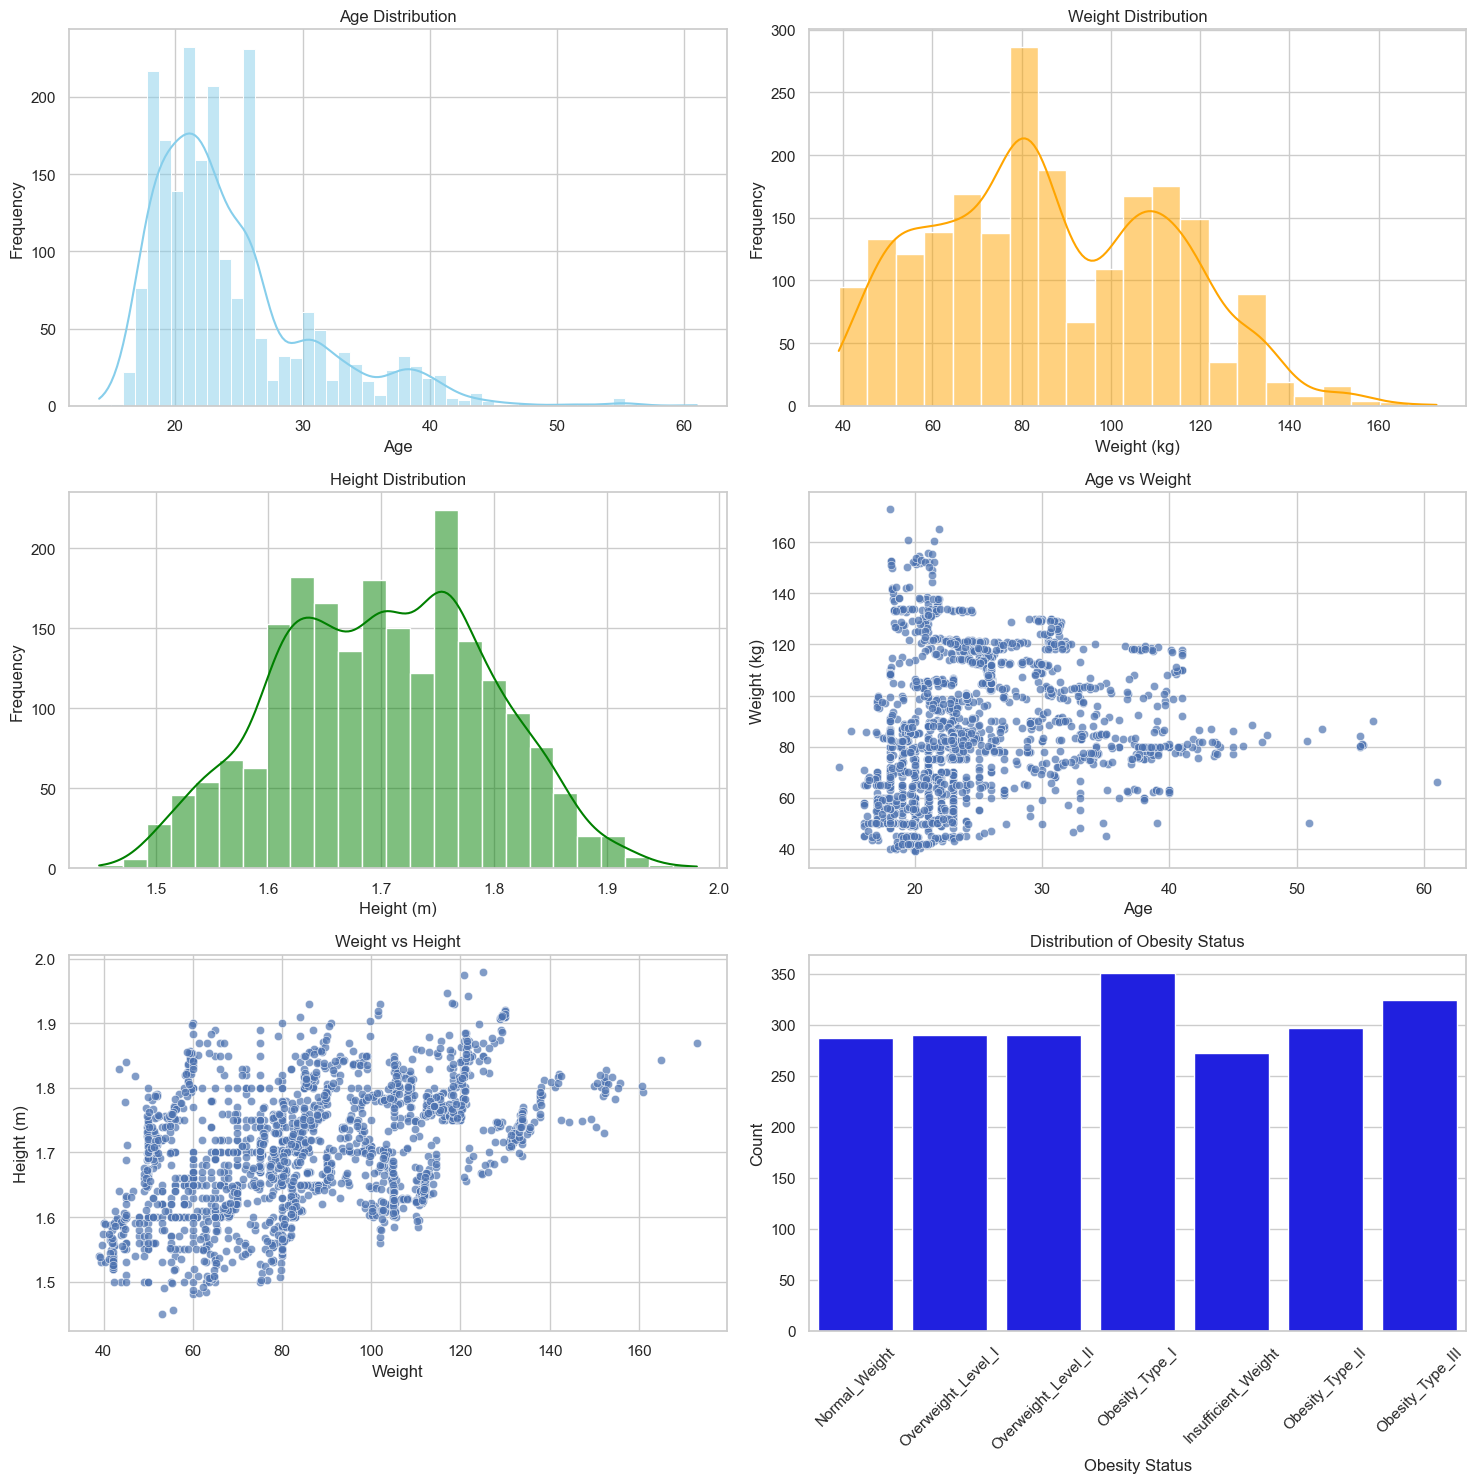

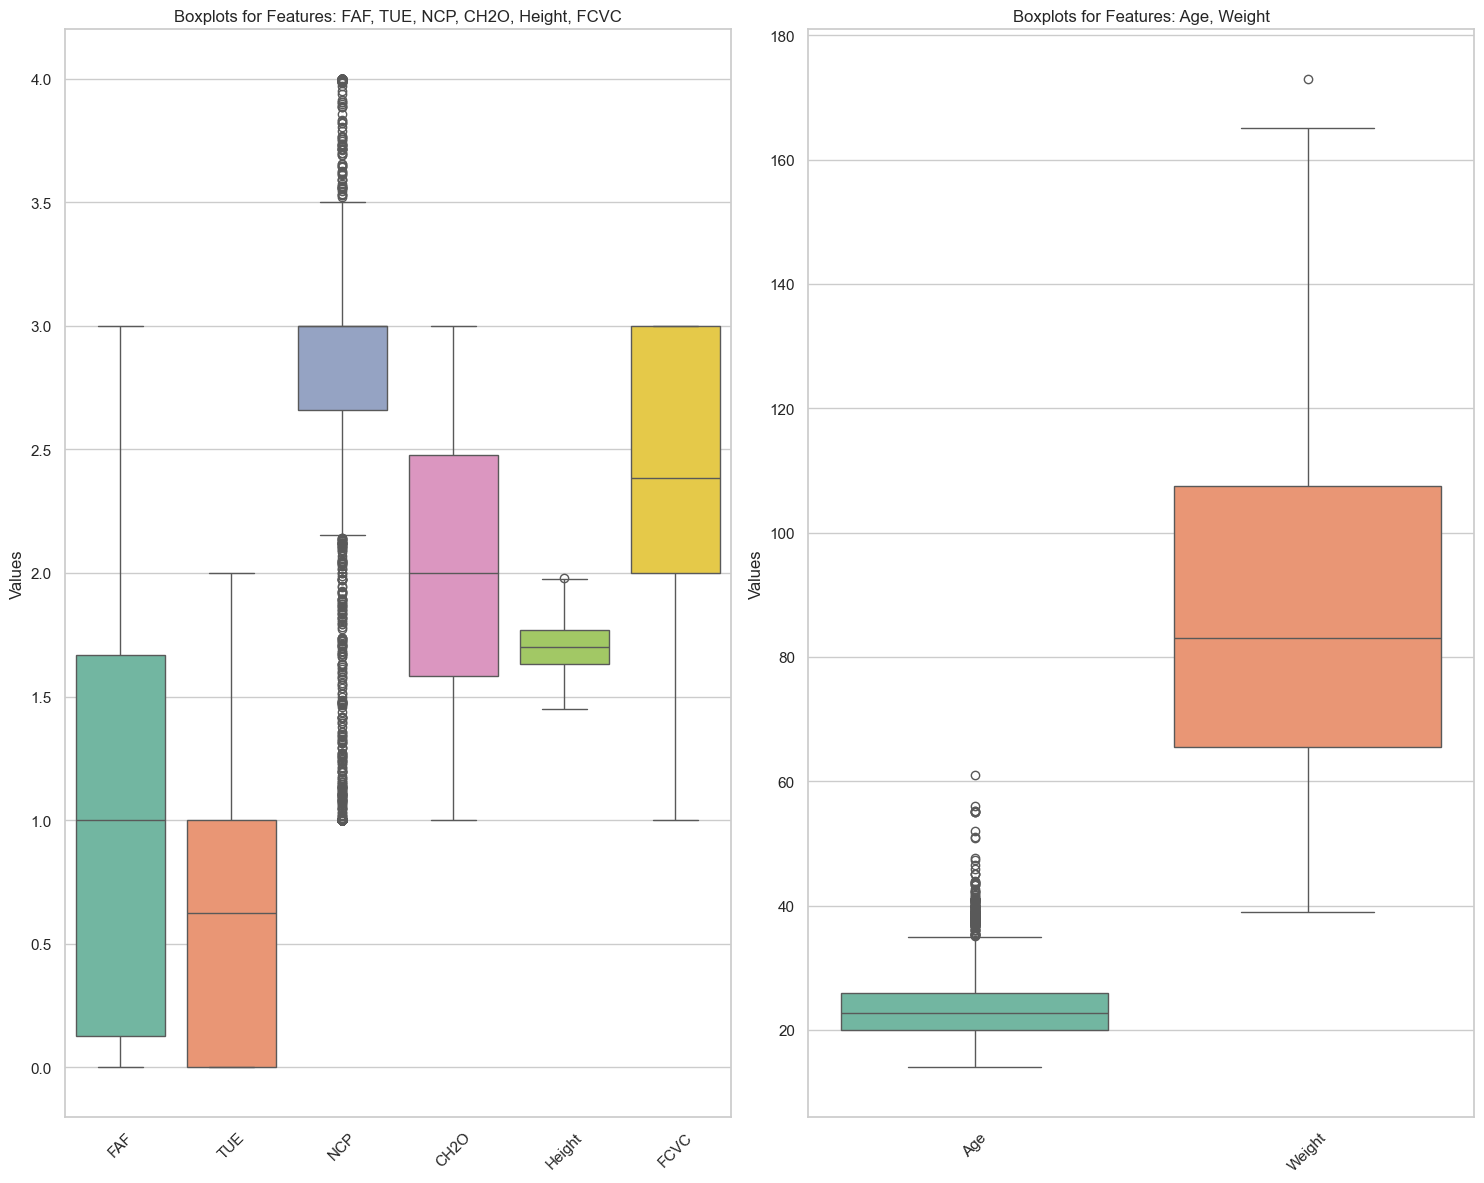

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
# اجرای تابع
visualize_and_draw_boxplots(data)
display(data.head())
data.describe()

بررسی نرمال بودن 

### تفسیر نتایج آزمون‌های نرمال بودن داده‌ها ###
در این جدول نتایج آزمون‌های نرمال بودن داده‌ها (شاپیرو-ویلک و دآگستینو) برای هر ستون عددی ارائه شده است:
- **p-value > 0.05**: داده‌ها به‌عنوان نرمال شناخته می‌شوند.
- **p-value ≤ 0.05**: داده‌ها نرمال نیستند.
- ستون‌های **Normal (Shapiro-Wilk)** و **Normal (D’Agostino)** نشان‌دهنده‌ی نتیجه‌ی پذیرش یا رد فرضیه نرمال بودن برای هر آزمون هستند.
- توجه: ممکن است نتایج آزمون‌ها متفاوت باشد چون روش‌های آماری مختلفی استفاده می‌کنند.
-------------------------------------------------------



,Column,Shapiro-Wilk p-value,D’Agostino p-value,Normal (Shapiro-Wilk),Normal (D’Agostino)
0,Age,3.518278e-39,7.370137e-131,خیر,خیر
1,Height,2.771742e-08,7.225225e-13,خیر,خیر
2,Weight,3.770147e-18,1.903349e-29,خیر,خیر
3,FCVC,2.435506e-41,1.291280e-31,خیر,خیر
4,NCP,2.273978e-49,2.143633e-66,خیر,خیر
5,CH2O,1.116073e-29,2.360806e-57,خیر,خیر
6,FAF,7.714519e-33,4.358395e-34,خیر,خیر
7,TUE,7.391898e-37,4.630901e-37,خیر,خیر


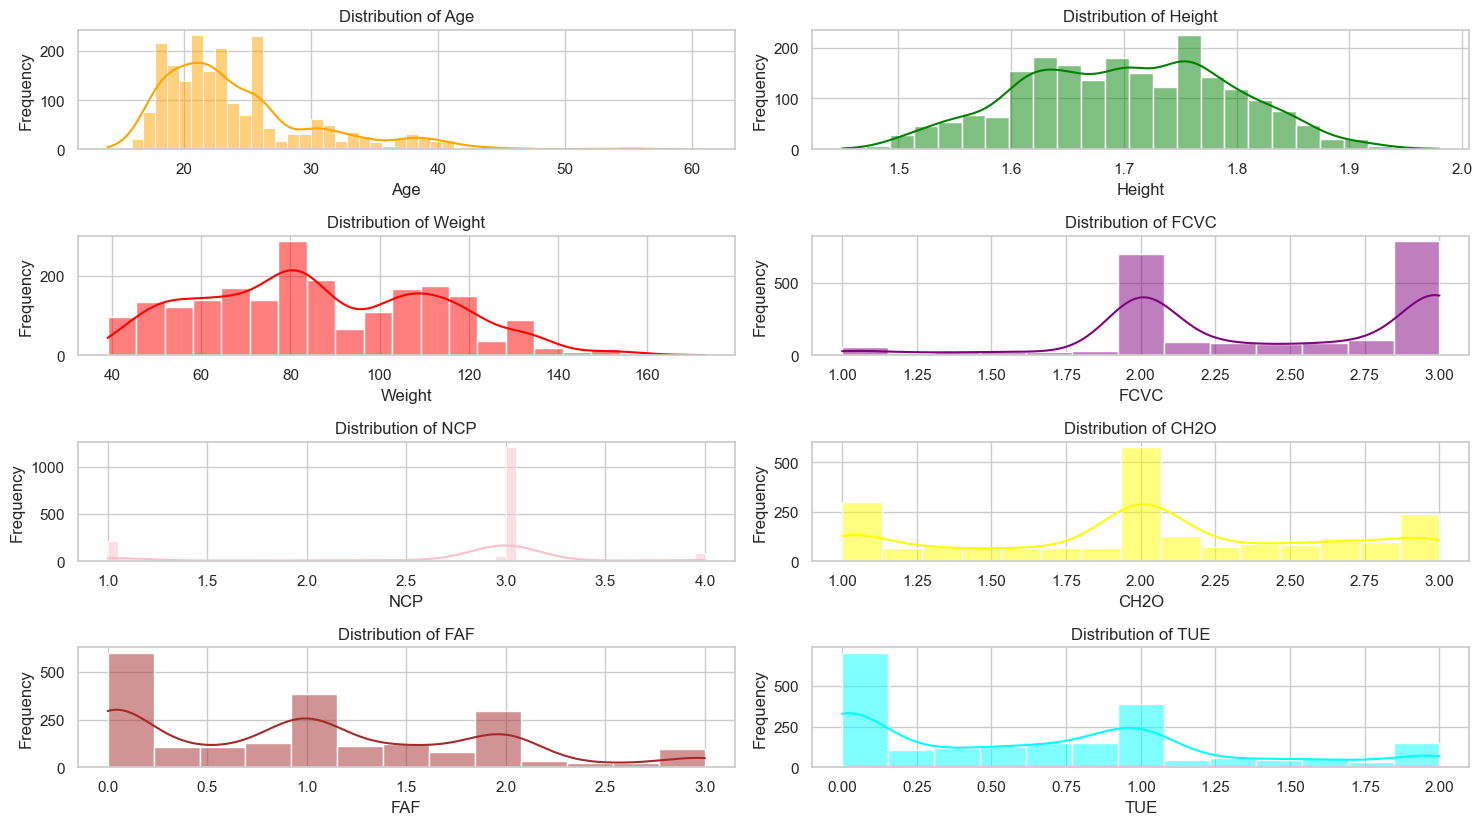

In [5]:
def check_normality(data):
    # کپی از داده‌ها برای کار روی ستون‌های عددی
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # ذخیره نتایج
    normality_results = []
    
    # بررسی هر ستون عددی
    for column in numeric_data.columns:
        column_data = numeric_data[column].dropna()  # حذف مقادیر گمشده
        if len(column_data) > 3:  # حداقل تعداد داده‌ها برای آزمون
            # آزمون شاپیرو-ویلک
            stat_shapiro, p_shapiro = shapiro(column_data)
            # آزمون داغستینو (D’Agostino and Pearson’s)
            stat_dagostino, p_dagostino = normaltest(column_data)
            # ذخیره نتایج
            normality_results.append({
                'Column': column,
                'Shapiro-Wilk p-value': p_shapiro,
                'D’Agostino p-value': p_dagostino,
                'Normal (Shapiro-Wilk)': 'بله' if p_shapiro > 0.05 else 'خیر',
                'Normal (D’Agostino)': 'بله' if p_dagostino > 0.05 else 'خیر'
            })
    
    # تبدیل نتایج به یک DataFrame
    normality_df = pd.DataFrame(normality_results)
    
    # توضیح نتایج
    print("### تفسیر نتایج آزمون‌های نرمال بودن داده‌ها ###")
    print("در این جدول نتایج آزمون‌های نرمال بودن داده‌ها (شاپیرو-ویلک و دآگستینو) برای هر ستون عددی ارائه شده است:")
    print("- **p-value > 0.05**: داده‌ها به‌عنوان نرمال شناخته می‌شوند.")
    print("- **p-value ≤ 0.05**: داده‌ها نرمال نیستند.")
    print("- ستون‌های **Normal (Shapiro-Wilk)** و **Normal (D’Agostino)** نشان‌دهنده‌ی نتیجه‌ی پذیرش یا رد فرضیه نرمال بودن برای هر آزمون هستند.")
    print("- توجه: ممکن است نتایج آزمون‌ها متفاوت باشد چون روش‌های آماری مختلفی استفاده می‌کنند.")
    print("-------------------------------------------------------\n")
    
    # نمایش جدول نتایج
    display(normality_df)
    
    # رنگ‌های مختلف برای هر نمودار
    colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow', 'brown', 'cyan', 'gray']
    
    # رسم نمودار توزیع برای داده‌های عددی
    plt.figure(figsize=(15, 10))
    
    # رسم نمودارها به صورت ۲ در ۲
    for i, column in enumerate(numeric_data.columns, 1):
        color = colors[i % len(colors)]  # انتخاب رنگ متفاوت
        plt.subplot(len(numeric_data.columns) // 2 + 1, 2, i)
        sns.histplot(numeric_data[column], kde=True, color=color)
        plt.title(f'Distribution of {column}')  # English title
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()  # تنظیم فواصل بین نمودارها
    plt.show()
    
    return normality_df

# اجرای تابع
normality_results = check_normality(data)


تابع نرمال سازی داده ها با دو روش مین مکس و زد اسکور

برای تمرین تابع سازی به این صورت نوشته شده است و نیازی به ساخت تابع نرمال ساز مجزا نبود

In [6]:
def normalize_data(data, method='z-score'):
    """
    This function normalizes numerical columns in a DataFrame using either 'z-score' or 'min-max' method.
    
    :param data: Input DataFrame.
    :param method: Normalization method. 'z-score' or 'min-max'.
    
    :return: DataFrame with normalized values.
    """
    # کپی از داده‌ها برای جلوگیری از تغییرات مستقیم
    data_normalized = data.copy()
    
    # انتخاب ستون‌های عددی
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # انتخاب روش نرمال‌سازی
    if method == 'z-score':
        scaler = StandardScaler()  # استانداردسازی داده‌ها (Z-score)
    elif method == 'min-max':
        scaler = MinMaxScaler()  # نرمال‌سازی به بازه [0, 1] (Min-Max)
    else:
        raise ValueError("Method must be 'z-score' or 'min-max'")
    
    # نرمال‌سازی هر ستون عددی
    data_normalized[numeric_data.columns] = scaler.fit_transform(numeric_data)
    
    return data_normalized


بررسی نرمال ساز مین-مکس

In [7]:
# اجرای تابع
normalized_data_MM = normalize_data(data, method='min-max')  # برای نرمال‌سازی با min-max
# اگر بخواهید از Min-Max استفاده کنید:
# normalized_data = normalize_data(data, method='z-score')


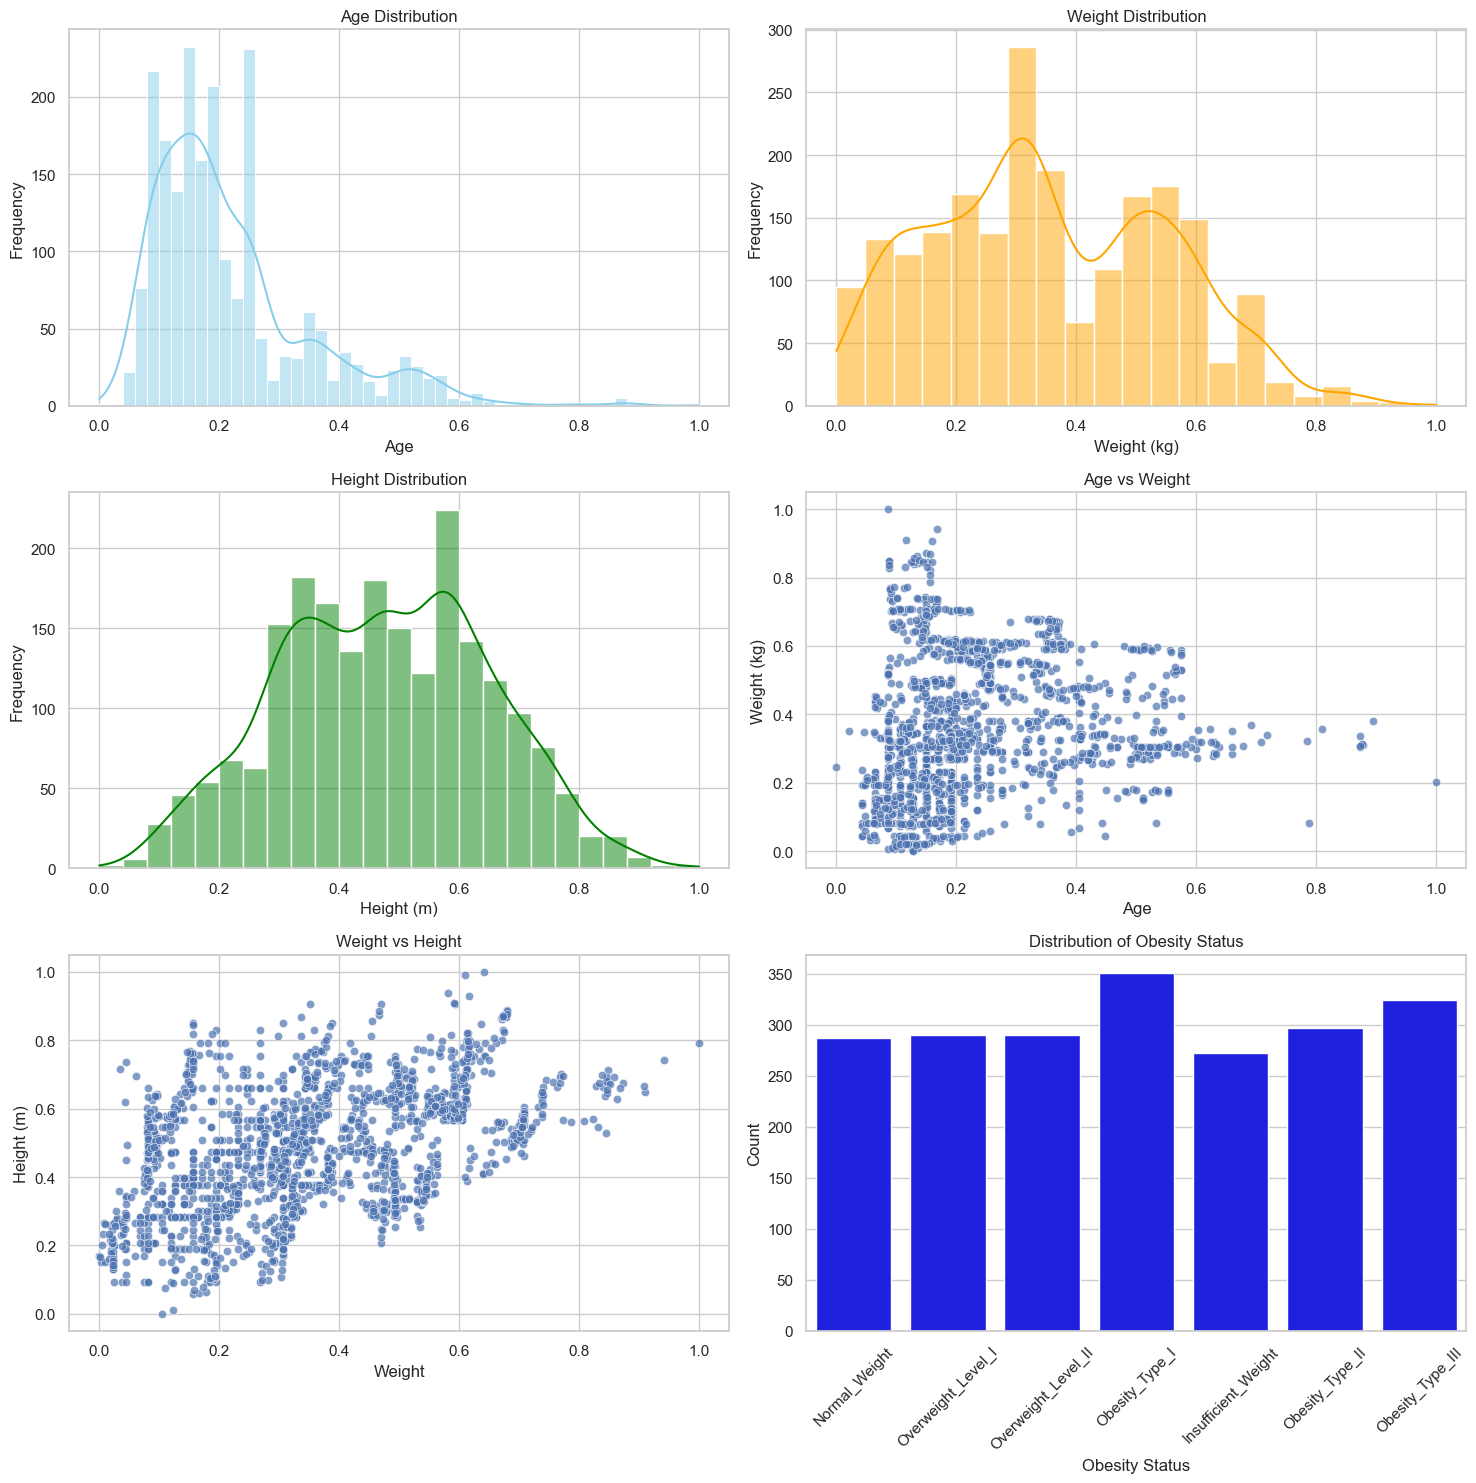

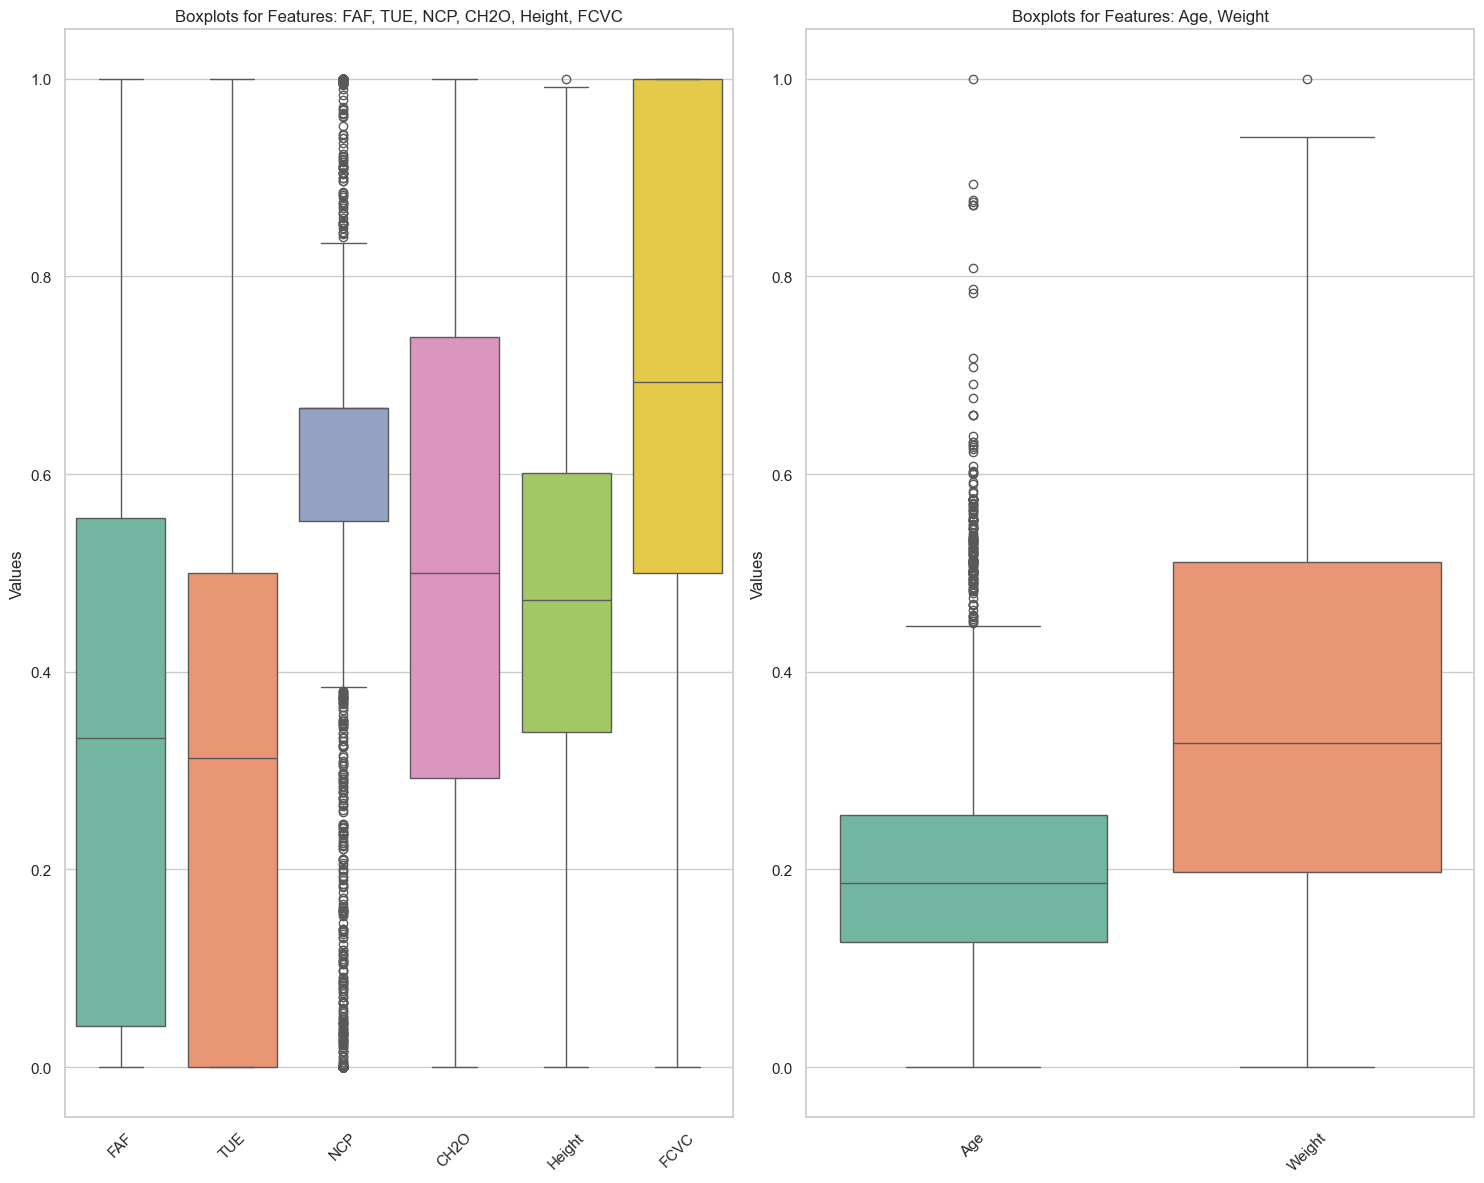

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,0.148936,0.320755,0.186567,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.000000,0.5,no,Public_Transportation,Normal_Weight
1,Female,0.148936,0.132075,0.126866,yes,no,1.0,0.666667,Sometimes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,0.191489,0.660377,0.283582,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.666667,0.5,Frequently,Public_Transportation,Normal_Weight
3,Male,0.276596,0.660377,0.358209,no,no,1.0,0.666667,Sometimes,no,0.5,no,0.666667,0.0,Frequently,Walking,Overweight_Level_I
4,Male,0.170213,0.622642,0.379104,no,no,0.5,0.000000,Sometimes,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
# اجرای تابع
visualize_and_draw_boxplots(normalized_data_MM)
display(normalized_data_MM.head())


بررسی نرمال ساز زد اسکور یا همون استاندارد اسکیلر

In [9]:
# اجرای تابع
normalized_data_ZS = normalize_data(data, method='z-score')  # برای نرمال‌سازی با Z-Score
# اگر بخواهید از Min-Max استفاده کنید:
# normalized_data = normalize_data(data, method='min-max')

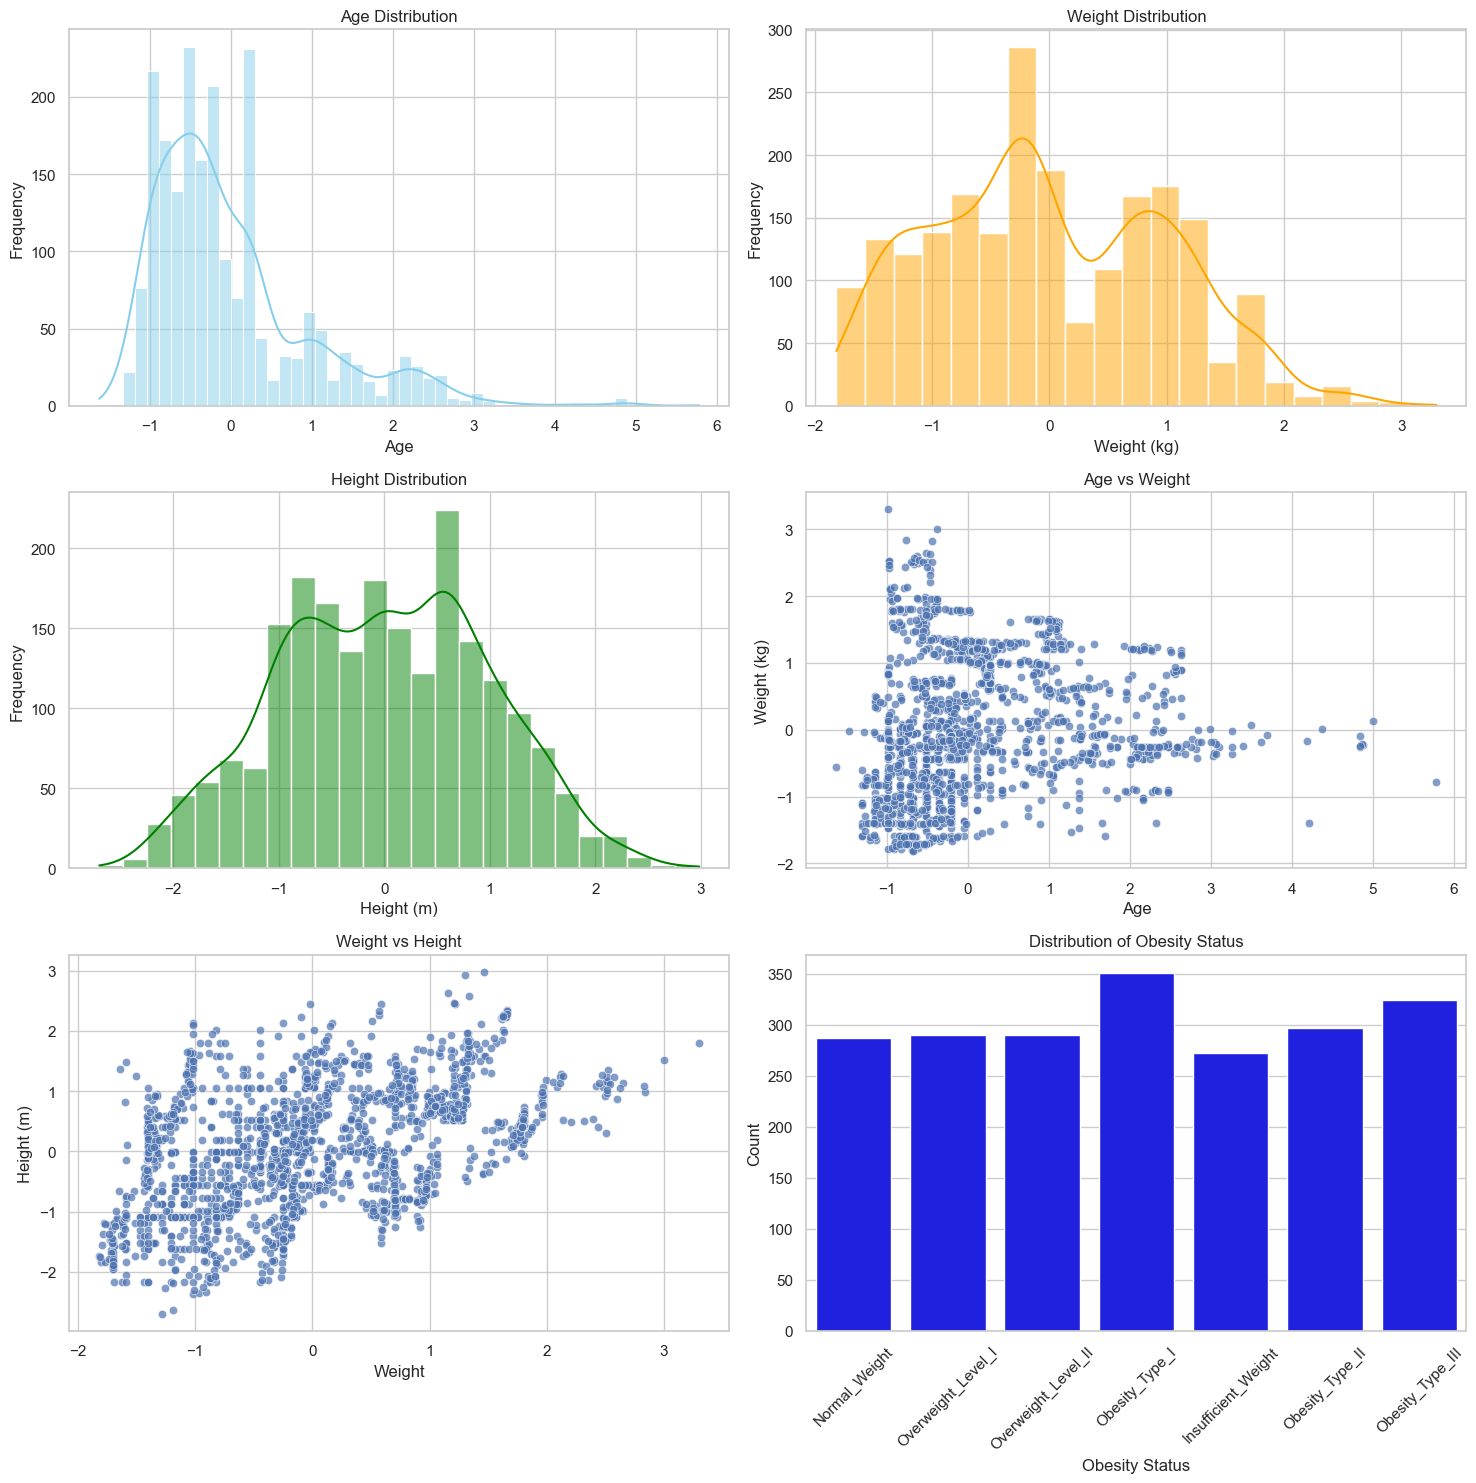

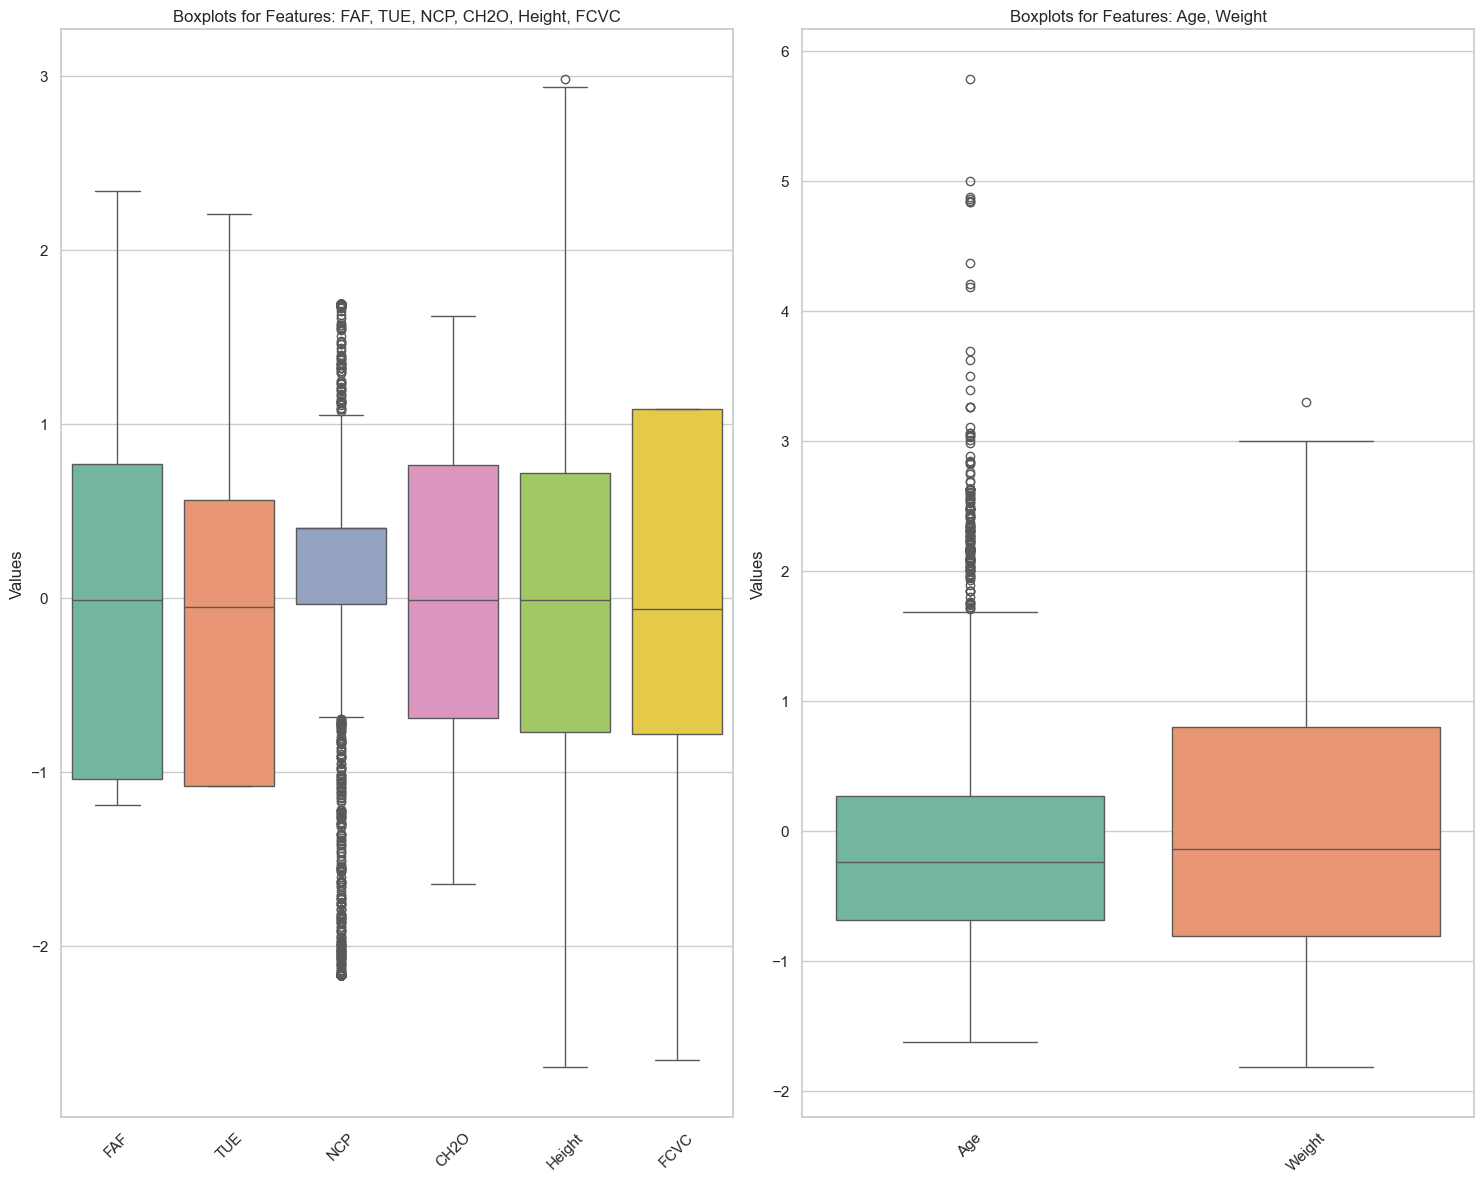

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,-0.522124,-0.875589,-0.862558,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,-1.188039,0.561997,no,Public_Transportation,Normal_Weight
1,Female,-0.522124,-1.947599,-1.168077,yes,no,1.088342,0.404153,Sometimes,yes,1.618759,yes,2.339750,-1.080625,Sometimes,Public_Transportation,Normal_Weight
2,Male,-0.206889,1.054029,-0.366090,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,1.163820,0.561997,Frequently,Public_Transportation,Normal_Weight
3,Male,0.423582,1.054029,0.015808,no,no,1.088342,0.404153,Sometimes,no,-0.013073,no,1.163820,-1.080625,Frequently,Walking,Overweight_Level_I
4,Male,-0.364507,0.839627,0.122740,no,no,-0.785019,-2.167023,Sometimes,no,-0.013073,no,-1.188039,-1.080625,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
# اجرای تابع
visualize_and_draw_boxplots(normalized_data_ZS)
display(normalized_data_ZS.head())


### Correlation Matrix ###


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


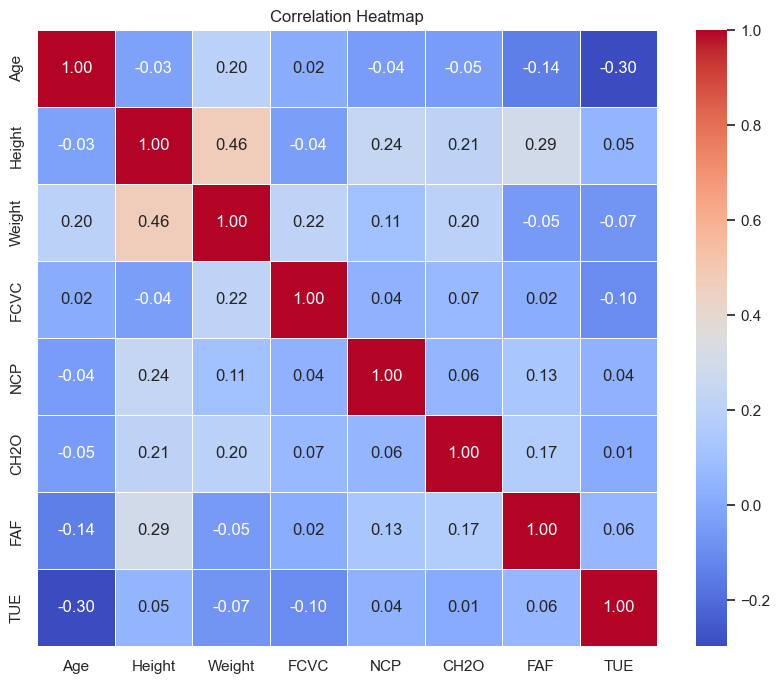

In [11]:
# تعیین میزان همبستگی 
def check_correlation(data):
    """
    This function calculates and visualizes the correlation matrix of all numerical columns in the DataFrame.
    
    :param data: Input DataFrame.
    
    :return: Correlation matrix DataFrame.
    """
    # انتخاب ستون‌های عددی
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # محاسبه ماتریس همبستگی
    correlation_matrix = numeric_data.corr()
    
    # نمایش جدول همبستگی
    print("### Correlation Matrix ###")
    display(correlation_matrix)
    
    # رسم نمودار گرادیان همبستگی
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
    
    return correlation_matrix

# اجرای تابع
correlation_matrix = check_correlation(data)


# فاز دوم

برای پر کردن مقادیر گمشده اول باید مقادیر گمشده رو در داده ها ایجاد کرد و بعد به پر کردن آنها پرداخت


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,NaN,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,NaN,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,NaN,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,NaN,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Missing Values in Each Column:
Gender                               0
Age                                  0
Height                               0
Weight                            1021
family_history_with_overweight       0
FAVC                                 0
FCVC                                 0
NCP                                  0
CAEC                                 0
SMOKE                                0
CH2O                                 0
SCC                                  0
FAF                                  0
TUE                                  0
CALC                                 0
MTRANS                               0
NObeyesdad                           0
dtype: int64
Missing Values After Imputation:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP     

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,75.805155,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,99.808876,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,87.904364,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,92.952346,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


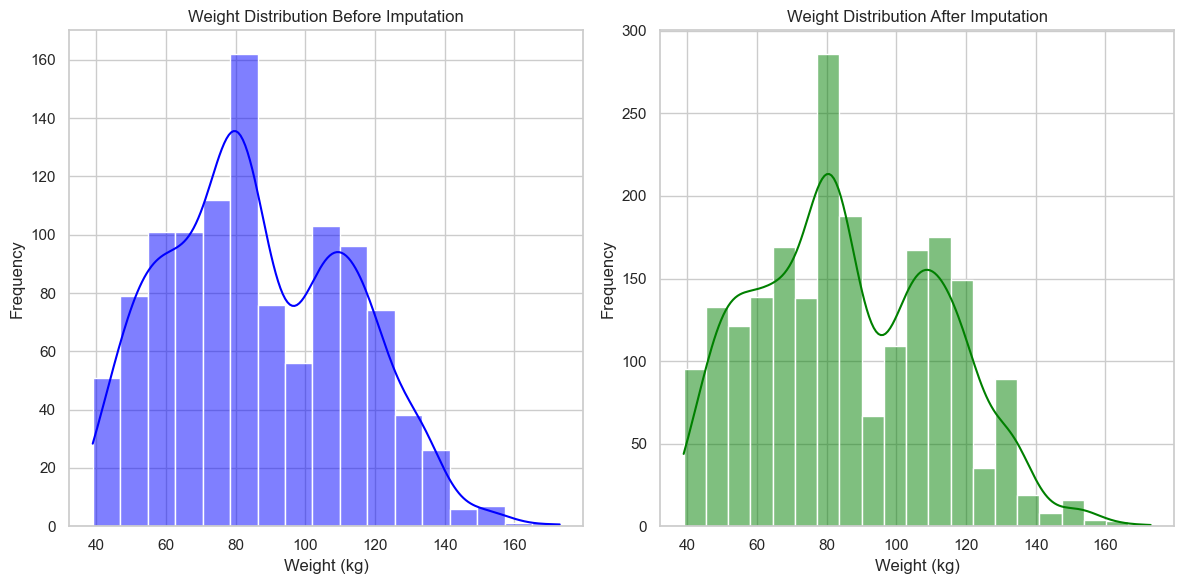

In [12]:
missing_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

mask = np.random.random(len(missing_data)) < 0.5
missing_data.loc[mask, 'Weight'] = np.nan

display(missing_data)

# بررسی تعداد مقادیر گمشده
missing_values = missing_data.isnull().sum()  # تغییر داده به missing_data
print("Missing Values in Each Column:")
print(missing_values)

# انتخاب ویژگی‌هایی که دارای مقادیر گمشده هستند
missing_features = [col for col in missing_data.columns if missing_data[col].isnull().sum() > 0]  # تغییر داده به missing_data

# مثال: پر کردن مقادیر گمشده در صفت Weight
# داده‌ها را به دو بخش تقسیم می‌کنیم: داده‌های کامل و داده‌های دارای مقدار گمشده
complete_data = missing_data[missing_data['Weight'].notnull()]  # تغییر داده به missing_data
missing_data_subset = missing_data[missing_data['Weight'].isnull()]  # تغییر داده به missing_data

# استفاده از رگرسیون برای پیش‌بینی مقادیر گمشده
# انتخاب ویژگی‌های مرتبط (مثلاً Height و Age برای پیش‌بینی Weight)
regressor = LinearRegression()
regressor.fit(complete_data[['Height']], complete_data['Weight'])  # تغییر داده به missing_data

# پیش‌بینی مقادیر گمشده
predicted_values = regressor.predict(missing_data_subset[['Height']])  # تغییر داده به missing_data

# جایگزینی مقادیر گمشده با مقادیر پیش‌بینی‌شده
missing_data.loc[missing_data['Weight'].isnull(), 'Weight'] = predicted_values  # تغییر داده به missing_data

# تأیید تکمیل مقادیر گمشده
print("Missing Values After Imputation:")
print(missing_data.isnull().sum())  # تغییر داده به missing_data

display(missing_data)

# Visualization: Distribution Before and After Imputation
import matplotlib.pyplot as plt

# Before Imputation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(complete_data['Weight'], kde=True, color='blue')
plt.title('Weight Distribution Before Imputation')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# After Imputation
plt.subplot(1, 2, 2)
sns.histplot(data['Weight'], kde=True, color='green')
plt.title('Weight Distribution After Imputation')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

پیدا کردن موثرترین صفت در پیش‌بینی ویژگی کلاس هدف:

هدف از این بخش، تعیین اهمیت ویژگی‌های مختلف در پیش‌بینی کلاس هدف (چاقی‌شناسی) و تجسم فرآیند تصمیم‌گیری مدل با استفاده از یک درخت تصمیم در مدل جنگل تصادفی بود.

مراحل انجام کار:

پیش‌پردازش داده‌ها: ستون‌های دسته‌ای (مثل جنسیت، سابقه خانوادگی، و غیره) به مقادیر عددی تبدیل شدند تا مدل جنگل تصادفی بتواند با آنها کار کند.

تعریف متغیرهای ورودی و خروجی: ویژگی‌های ورودی: شامل تمام ویژگی‌هایی که برای پیش‌بینی استفاده می‌شوند. ویژگی هدف: کلاس هدف که باید پیش‌بینی شود.

ساخت و آموزش مدل جنگل تصادفی: مدل جنگل تصادفی به عنوان یک الگوریتم طبقه‌بندی انتخاب شد و روی داده‌های ورودی آموزش داده شد.

استخراج اهمیت ویژگی‌ها: با استفاده از ویژگی "اهمیت ویژگی‌ها" در مدل، میزان تأثیر هر ویژگی بر پیش‌بینی کلاس هدف محاسبه شد. اهمیت ویژگی‌ها نشان‌دهنده میزان سهم هر ویژگی در کاهش معیار خطا (مثل ناپاکی جینی) است.

نمایش و مصورسازی اهمیت ویژگی‌ها: اهمیت ویژگی‌ها به صورت عددی مرتب و سپس با نمودار میله‌ای نمایش داده شد. این کار کمک می‌کند تا مشخص شود کدام ویژگی‌ها در پیش‌بینی کلاس هدف بیشترین اهمیت را دارند.

تجسم درخت تصمیم: یکی از درخت‌های تصمیم در مدل جنگل تصادفی انتخاب و به صورت گرافیکی نمایش داده شد. این کار برای توضیح نحوه تصمیم‌گیری مدل استفاده می‌شود.

نتیجه:

ویژگی‌های با اهمیت بالا (مثل ویژگی‌های ورودی اصلی) برای پیش‌بینی کلاس هدف شناسایی شدند. مدل جنگل تصادفی به دلیل قابلیت استخراج اهمیت ویژگی و نمایش گرافیکی تصمیم‌گیری، ابزار مناسبی برای این کار بود.

مزیت:

این فرآیند به ما کمک می‌کند که بفهمیم چه عواملی تأثیر بیشتری در پیش‌بینی نتیجه دارند و مدل چگونه از این عوامل برای تصمیم‌گیری استفاده می‌کند.

                           Feature  Importance
3                           Weight    0.346339
2                           Height    0.104206
1                              Age    0.100399
6                             FCVC    0.083822
0                           Gender    0.060209
7                              NCP    0.048977
13                             TUE    0.044374
12                             FAF    0.040627
10                            CH2O    0.039121
8                             CAEC    0.031502
4   family_history_with_overweight    0.028910
14                            CALC    0.028862
15                          MTRANS    0.019011
5                             FAVC    0.016293
11                             SCC    0.005287
9                            SMOKE    0.002060


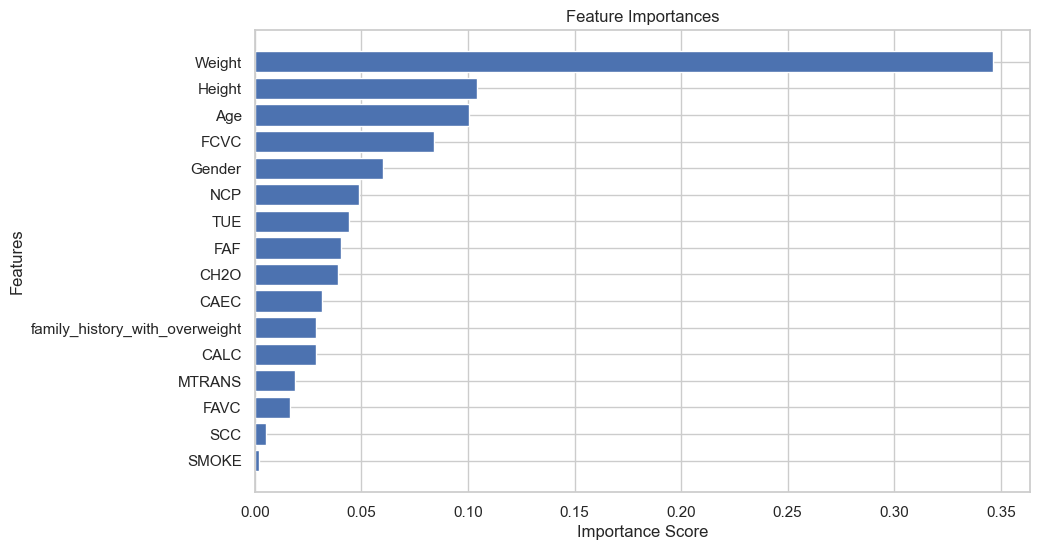

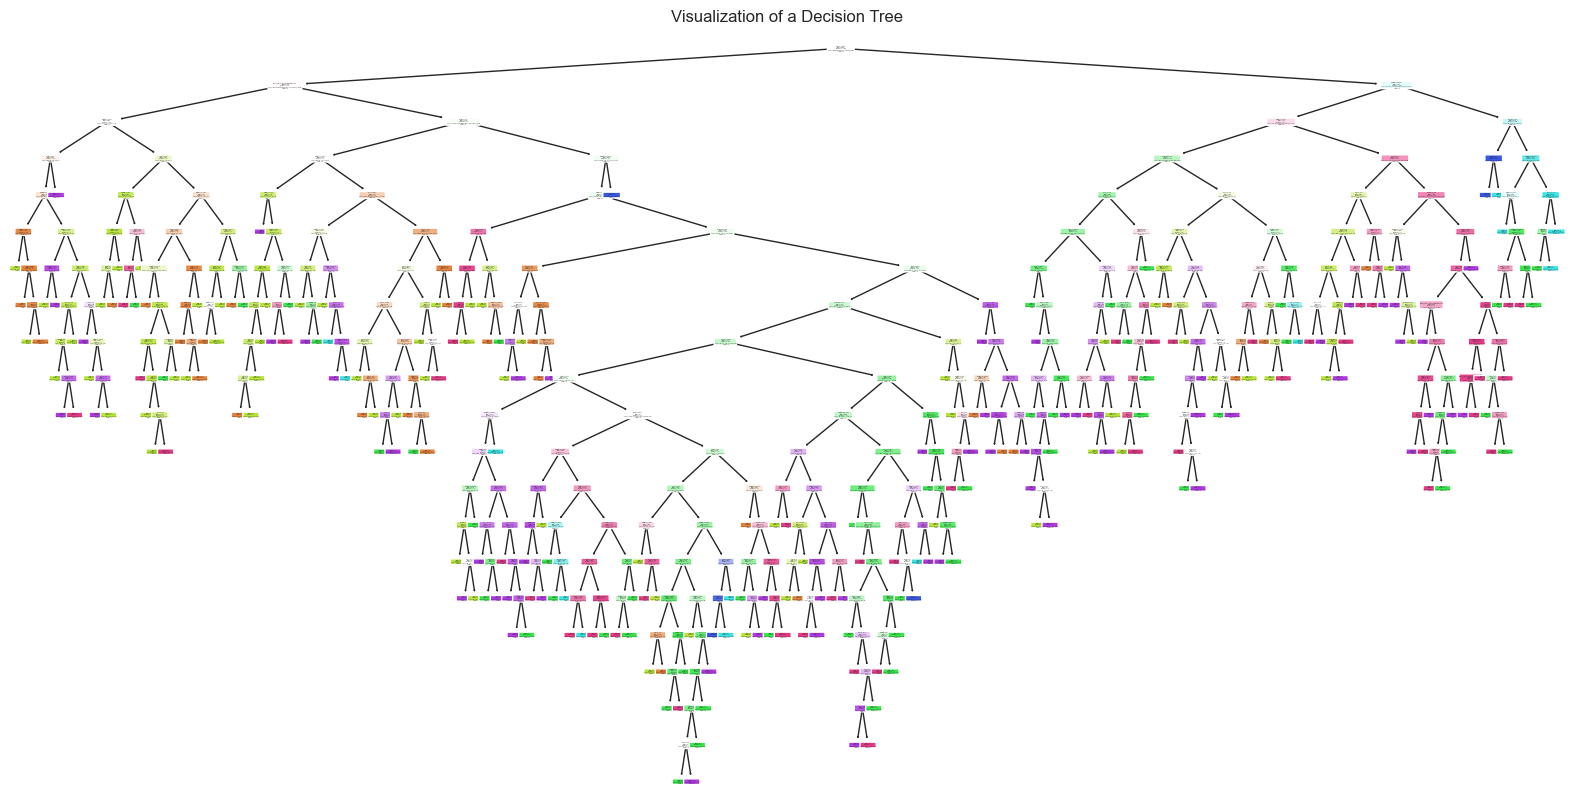

'decision_tree.pdf'

In [13]:
# کپی از داده‌ها برای تبدیل مقادیر طبقه‌ای
numeric_data = data.copy()

# تبدیل مقادیر طبقه‌ای به عددی و ذخیره در نسخه جدید
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS', 'NObeyesdad', 'SCC']

for col in categorical_columns:
    if col in numeric_data.columns:
        le = LabelEncoder()
        numeric_data[col] = le.fit_transform(numeric_data[col])

# تعریف متغیرهای ورودی و خروجی
X = numeric_data.drop(columns=['NObeyesdad'])
y = numeric_data['NObeyesdad']

# ساخت مدل Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# استخراج اهمیت ویژگی‌ها
feature_importances = model.feature_importances_

# مرتب‌سازی و نمایش اهمیت ویژگی‌ها
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# مصورسازی اهمیت ویژگی‌ها
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# انتخاب یکی از درخت‌های Random Forest
decision_tree = model.estimators_[0]  # انتخاب اولین درخت

# تبدیل کلاس‌ها به رشته
class_names = [str(cls) for cls in model.classes_]

# رسم درخت با plot_tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.title("Visualization of a Decision Tree")
plt.show()

# تبدیل درخت به فرمت Graphviz
dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=class_names,  # اینجا کلاس‌ها را به رشته تبدیل کردیم
    filled=True,
    rounded=True,
    special_characters=True
)

# نمایش گرافیکی
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # ذخیره درخت به صورت فایل
graph.view()


بررسی تاثیر حذف داده‌های پرت بر دقت مدل

هدف:

هدف از این پروژه، بررسی تاثیر حذف داده‌های پرت بر دقت مدل طبقه‌بندی جنگل تصادفی است. داده‌های پرت می‌توانند روی دقت مدل تاثیر منفی داشته باشند، بنابراین حذف آن‌ها ممکن است باعث بهبود عملکرد مدل شود.

مراحل انجام کار:

شناسایی ستون‌های دسته‌بندی (طبقه‌ای):

ستون‌هایی که شامل مقادیر دسته‌ای مانند جنسیت، سابقه خانوادگی با چاقی و غیره بودند، شناسایی شدند.

تبدیل مقادیر دسته‌ای به عددی:

برای این کار، از یک الگوریتم تبدیل مقادیر متنی به عددی استفاده شد تا داده‌ها برای مدل قابل استفاده باشند.

حذف داده‌های پرت:

با استفاده از چارک اول و سوم و محاسبه فاصله بین چارکی (IQR)، بازه‌ای مشخص شد که داده‌های خارج از آن به عنوان داده پرت در نظر گرفته شدند.
داده‌های پرت برای ستون‌های عددی مانند سن، قد، وزن و مصرف آب شناسایی و حذف شدند.

تقسیم داده‌ها:

داده‌ها به دو بخش اصلی تقسیم شدند:

داده‌های اصلی: بدون حذف داده‌های پرت.

داده‌های تمیز شده: پس از حذف داده‌های پرت.

ساخت و آموزش مدل:

دو مدل جنگل تصادفی ساخته شد؛ یکی برای داده‌های اصلی و دیگری برای داده‌های تمیز شده.
داده‌ها به دو بخش آموزش (80 درصد) و آزمون (20 درصد) تقسیم شدند و مدل‌ها روی داده‌ها آموزش دیدند.
محاسبه دقت مدل‌ها:
دقت مدل‌ها روی داده‌های آزمون محاسبه شد تا تاثیر حذف داده‌های پرت بررسی شود.

مقایسه دقت:

نتایج دقت مدل‌ها به صورت نمودار میله‌ای نمایش داده شد تا تاثیر حذف داده‌های پرت بر عملکرد مدل مشخص شود.

نتایج:

حذف داده‌های پرت باعث بهبود دقت مدل شد.
داده‌های تمیز شده (پس از حذف داده‌های پرت) عملکرد بهتری نسبت به داده‌های اصلی داشتند.

جمع‌بندی:

این فرآیند نشان داد که حذف داده‌های پرت می‌تواند باعث کاهش نویز در داده‌ها و بهبود عملکرد مدل‌های یادگیری ماشین شود.

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


Accuracy with Original Data: 0.9550827423167849
Accuracy with Cleaned Data: 0.9714285714285714


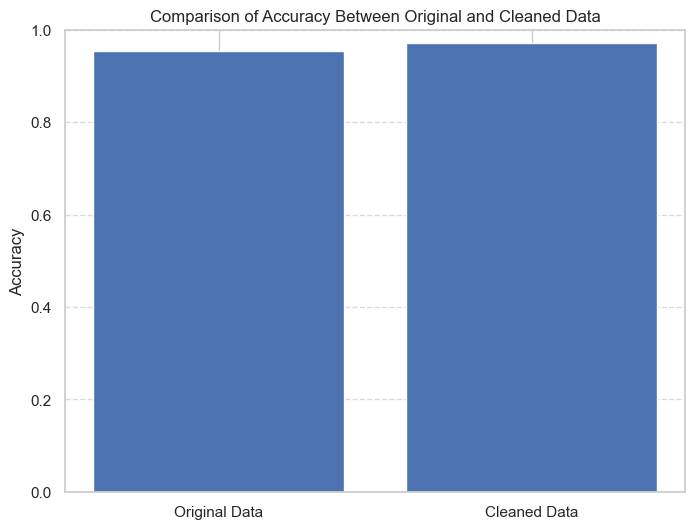

In [14]:
# شناسایی ستون‌های طبقه‌ای
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS', 'SCC', 'NObeyesdad']

# تابع تبدیل مقادیر متنی به عددی
def encode_data(data, categorical_columns):
    encoded_data = data.copy()
    for col in categorical_columns:
        if col in encoded_data.columns:  # بررسی وجود ستون
            le = LabelEncoder()
            encoded_data[col] = le.fit_transform(encoded_data[col])
    return encoded_data

# حذف داده‌های پرت برای داده‌های عددی
def remove_outliers(data, numerical_columns):
    clean_data = data.copy()
    for col in numerical_columns:
        Q1 = clean_data[col].quantile(0.25)
        Q3 = clean_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]
    return clean_data

# تعریف ستون‌های عددی
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# حذف داده‌های پرت
clean_data = remove_outliers(data, numerical_columns)

# داده‌های اصلی و تمیز شده
encoded_original_data = encode_data(data, categorical_columns)
encoded_clean_data = encode_data(clean_data, categorical_columns)

# تقسیم داده‌ها به ویژگی‌ها و هدف
X_original = encoded_original_data.drop(columns=['NObeyesdad'])
y_original = encoded_original_data['NObeyesdad']

X_clean = encoded_clean_data.drop(columns=['NObeyesdad'])
y_clean = encoded_clean_data['NObeyesdad']

# تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# ساخت مدل Random Forest و آموزش روی داده‌های اصلی
model_orig = RandomForestClassifier(random_state=42)
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)

# ساخت مدل Random Forest و آموزش روی داده‌های تمیز شده
model_clean = RandomForestClassifier(random_state=42)
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)

display(encoded_original_data)

# چاپ دقت‌ها
print(f"Accuracy with Original Data: {accuracy_orig}")
print(f"Accuracy with Cleaned Data: {accuracy_clean}")

# رسم نمودار مقایسه‌ای
plt.figure(figsize=(8, 6))
accuracy_scores = [accuracy_orig, accuracy_clean]
labels = ['Original Data', 'Cleaned Data']

plt.bar(labels, accuracy_scores)
plt.title('Comparison of Accuracy Between Original and Cleaned Data')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # مقیاس دقت بین 0 و 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


گسسته‌سازی داده‌های عددی برای استفاده در استخراج قوانین انجمنی

In [15]:
def discretize_data(data, numerical_columns, bins=3, labels=None):
    discrete_data = data.copy()
    for col in numerical_columns:
        discrete_data[col] = pd.cut(data[col], bins=bins, labels=labels, include_lowest=True)
    return discrete_data

# ستون‌های عددی
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# گسسته‌سازی داده‌ها
discrete_data = discretize_data(
    data,
    numerical_columns,
    bins=3,
    labels=['Low', 'Medium', 'High']
)
display(discrete_data.head())


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,Low,Low,Low,yes,no,Medium,Medium,Sometimes,no,Medium,no,Low,Medium,no,Public_Transportation,Normal_Weight
1,Female,Low,Low,Low,yes,no,High,Medium,Sometimes,yes,High,yes,High,Low,Sometimes,Public_Transportation,Normal_Weight
2,Male,Low,Medium,Low,yes,no,Medium,Medium,Sometimes,no,Medium,no,Medium,Medium,Frequently,Public_Transportation,Normal_Weight
3,Male,Low,Medium,Medium,no,no,High,Medium,Sometimes,no,Medium,no,Medium,Low,Frequently,Walking,Overweight_Level_I
4,Male,Low,Medium,Medium,no,no,Medium,Low,Sometimes,no,Medium,no,Low,Low,Sometimes,Public_Transportation,Overweight_Level_II


# فاز سوم

استخراج قواعد انجمنی

هدف:

هدف این کد، استخراج مجموعه‌های پرتکرار و قواعد انجمنی از داده‌های دسته‌بندی‌شده است. این قواعد به کشف روابط بین آیتم‌ها در داده‌ها کمک می‌کنند.

مراحل انجام کار:

تبدیل داده‌ها به قالب تراکنش‌ها:

داده‌های دسته‌بندی‌شده (گسسته) با استفاده از روش کدگذاری یک‌به‌چند (کدگذاری داغ) به قالب تراکنش‌ها تبدیل شدند.

اجرای الگوریتم آپریوری:

الگوریتم آپریوری برای شناسایی مجموعه‌های پرتکرار اجرا شد.
حداقل پشتیبانی برای شناسایی آیتم‌ها برابر با ۰.۳ تعیین شد.

استخراج قواعد انجمنی:

قواعد انجمنی با استفاده از معیار اعتماد با حداقل مقدار ۰.۸ استخراج شدند.
تعداد مجموعه‌های پرتکرار محاسبه و برای تنظیم آرگومان‌های الگوریتم استفاده شد.

نمایش مجموعه‌های پرتکرار و قواعد انجمنی:

مجموعه‌های پرتکرار و قواعد انجمنی به صورت جدولی خلاصه شده و نمایش داده شدند.

رسم نمودار پشتیبانی و اعتماد:

نموداری با محورهای پشتیبانی و اعتماد رسم شد.
مقدار افزایش به‌عنوان رنگ نقاط در نمودار نمایش داده شد.

ایجاد گراف از قواعد انجمنی:

با استفاده از قواعد استخراج‌شده، یک گراف جهت‌دار ایجاد شد.
گره‌ها نشان‌دهنده آیتم‌ها و لبه‌ها نشان‌دهنده قواعد انجمنی هستند.
وزن لبه‌ها بر اساس اعتماد و برچسب‌ها بر اساس مقدار افزایش تعیین شدند.
گراف برای نمایش روابط بین آیتم‌ها رسم شد.

کاربرد:

تحلیل سبد خرید: کشف روابط بین محصولات خریداری‌شده توسط مشتریان.

سیستم‌های پیشنهاددهنده: پیشنهاد محصولات مرتبط به مشتریان بر اساس قواعد انجمنی.

تحلیل داده‌های دسته‌بندی‌شده: شناسایی الگوها و روابط پنهان بین آیتم‌ها.

نتیجه:

مجموعه‌های پرتکرار با حداقل پشتیبانی مشخص شدند.
قواعد انجمنی با حداقل اعتماد استخراج شدند.
نمودار پشتیبانی و اعتماد و همچنین گراف قواعد انجمنی برای تحلیل بهتر نمایش داده شدند.

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


,Gender_Female,Gender_Male,Age_Low,Age_Medium,Age_High,Height_Low,Height_Medium,Height_High,Weight_Low,Weight_Medium,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,True,False,True,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
1,True,False,True,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
2,False,True,True,False,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,False,True,True,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,False,True,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2107,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2108,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2109,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False


Frequent Itemsets:
+----+-----------+------------------------------+
|    |   support | itemsets                     |
+====+===========+==============================+
|  0 |  0.494079 | frozenset({'Gender_Female'}) |
+----+-----------+------------------------------+
|  1 |  0.505921 | frozenset({'Gender_Male'})   |
+----+-----------+------------------------------+
|  2 |  0.819517 | frozenset({'Age_Low'})       |
+----+-----------+------------------------------+
|  3 |  0.621506 | frozenset({'Height_Medium'}) |
+----+-----------+------------------------------+
(1634, 2)
Association Rules:
+----+------------------------------+-------------------------------+----------------------+----------------------+-----------+--------------+----------+--------------------+-------------+--------------+-----------------+-----------+-------------+--------------+
|    | antecedents                  | consequents                   |   antecedent support |   consequent support |   support |   confidenc

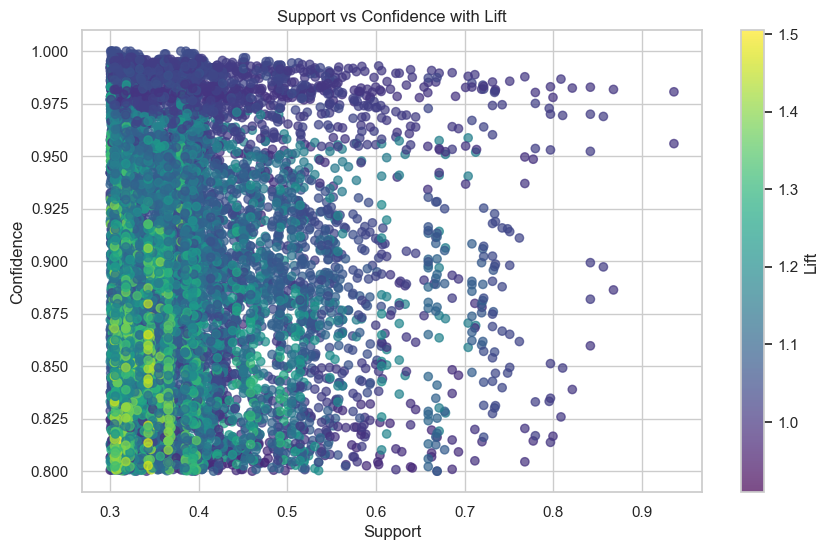

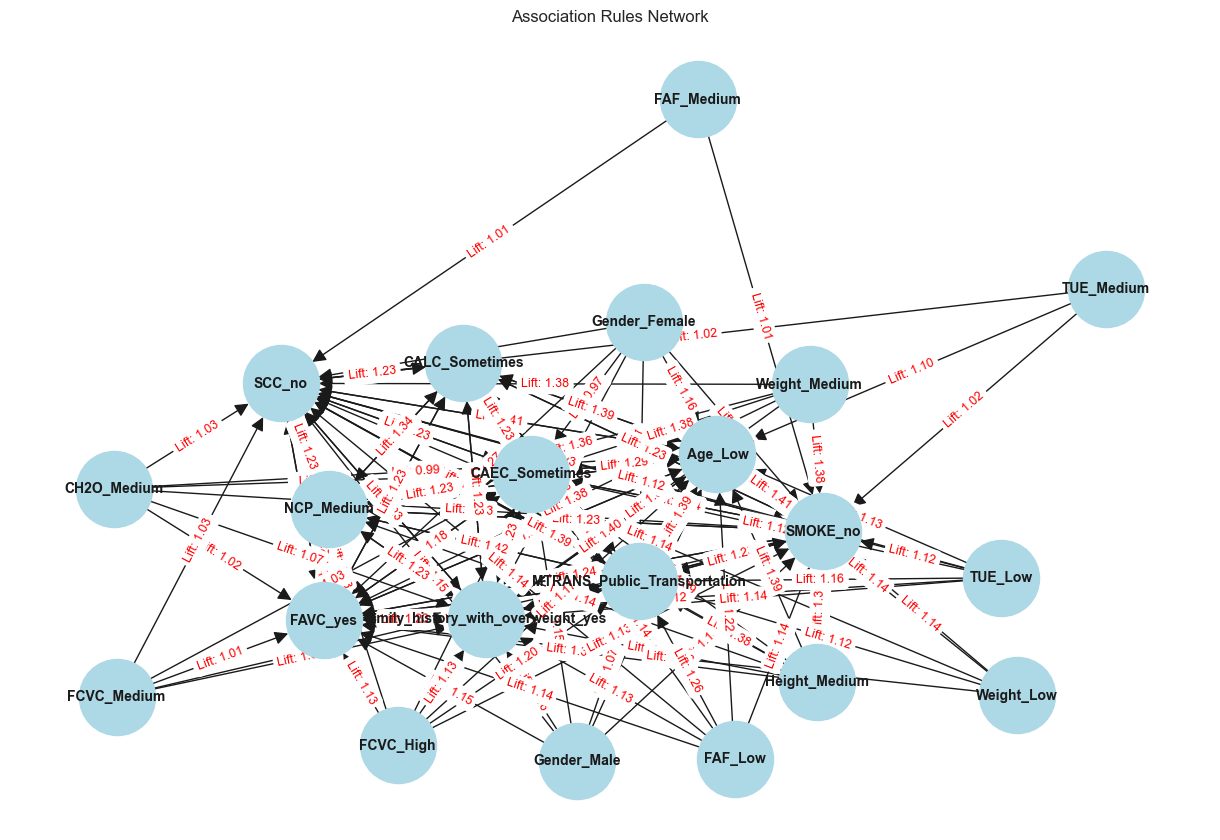

In [16]:
# تبدیل داده‌ها به قالب تراکنش‌ها (one-hot encoding)
transactions = pd.get_dummies(discrete_data)

# اجرای الگوریتم Apriori
frequent_itemsets = apriori(transactions, min_support=0.3, use_colnames=True)

# تعداد مجموعه‌های پرتکرار
num_itemsets = len(frequent_itemsets)

# اجرای استخراج قواعد با آرگومان اضافی
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8, num_itemsets=num_itemsets)

display(data)
display(transactions)

# نمایش قواعد
# نمایش مجموعه‌های پرتکرار به‌صورت خلاصه
print("Frequent Itemsets:")
print(tabulate(frequent_itemsets.head(4), headers='keys', tablefmt='grid'))
print(frequent_itemsets.shape)

# نمایش قوانین اجمنی به‌صورت خلاصه
print("Association Rules:")
print(tabulate(rules.head(4), headers='keys', tablefmt='grid'))
print(rules.shape)

# انتخاب ویژگی‌های مهم برای رسم نمودار
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Support vs Confidence with Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

# ایجاد گراف
G = nx.DiGraph()

# افزودن گره‌ها و لبه‌ها بر اساس قواعد
for _, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(
                antecedent,
                consequent,
                weight=rule['confidence'],
                label=f"Lift: {rule['lift']:.2f}"
            )

# رسم گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=9)
plt.title("Association Rules Network")
plt.show()

# فاز چهارم

مقایسه طبقه بندی

هدف:

هدف این کد، مقایسه عملکرد چند مدل طبقه‌بندی مختلف (درخت تصمیم، نزدیک‌ترین همسایه، و بگینگ) با استفاده از داده‌های پیش‌پردازش‌شده و اعتبارسنجی متقاطع است.

مراحل انجام کار:

پیش‌پردازش داده‌ها:

ستون‌های دسته‌ای (مانند جنسیت و سابقه خانوادگی) به مقادیر عددی تبدیل شدند.
ویژگی‌ها از داده‌ها جدا شده و استانداردسازی روی آن‌ها انجام شد تا مقادیر به مقیاس مناسب برسند (برای مدل نزدیک‌ترین همسایه).

تعریف اعتبارسنجی متقاطع:

از اعتبارسنجی متقاطع ۱۰ تایی استفاده شد که داده‌ها را به ۱۰ بخش تقسیم می‌کند و هر بار یکی از بخش‌ها را برای آزمون استفاده می‌کند.

تعریف مدل‌ها:

سه مدل طبقه‌بندی مورد بررسی قرار گرفتند:

درخت تصمیم
مدل نزدیک‌ترین همسایه (۵ همسایه)
مدل بگینگ با درخت تصمیم (با ۵۰ تخمین‌گر)

محاسبه معیارهای ارزیابی:

برای هر مدل، معیارهای زیر محاسبه شدند:

دقت (Precision): درصد پیش‌بینی‌های درست برای هر کلاس.

بازخوانی (Recall): میزان موفقیت در شناسایی موارد درست.

امتیاز F1: میانگین دقت و بازخوانی.

درصد خطا: ۱ منهای دقت.

مساحت زیر منحنی (AUC): معیاری برای سنجش توانایی مدل در تفکیک کلاس‌ها.

مقایسه مدل‌ها:

نتایج ارزیابی به صورت جدول و نمودار حرارتی (Heatmap) نمایش داده شدند تا عملکرد مدل‌ها به‌طور بصری قابل مقایسه باشد.

کاربرد:

انتخاب بهترین مدل: انتخاب مدلی که در معیارهای مختلف عملکرد بهتری دارد.
تحلیل عملکرد مدل‌ها: شناسایی نقاط ضعف و قوت مدل‌های طبقه‌بندی.
تصمیم‌گیری بر اساس داده‌ها: کمک به انتخاب مدل مناسب برای مسائل واقعی.

نتیجه:

هر سه مدل از نظر معیارهای مختلف مانند دقت، بازخوانی، و خطا مورد مقایسه قرار گرفتند.
مدل بگینگ به دلیل استفاده از چند درخت تصمیم معمولاً دقت بیشتری داشت.
نمودار حرارتی به وضوح تفاوت عملکرد مدل‌ها را نمایش داد.

جمع‌بندی:

این کد امکان ارزیابی و مقایسه دقیق مدل‌های طبقه‌بندی مختلف را فراهم می‌کند. انتخاب مدل نهایی به نیاز و ویژگی‌های داده بستگی دارد.

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


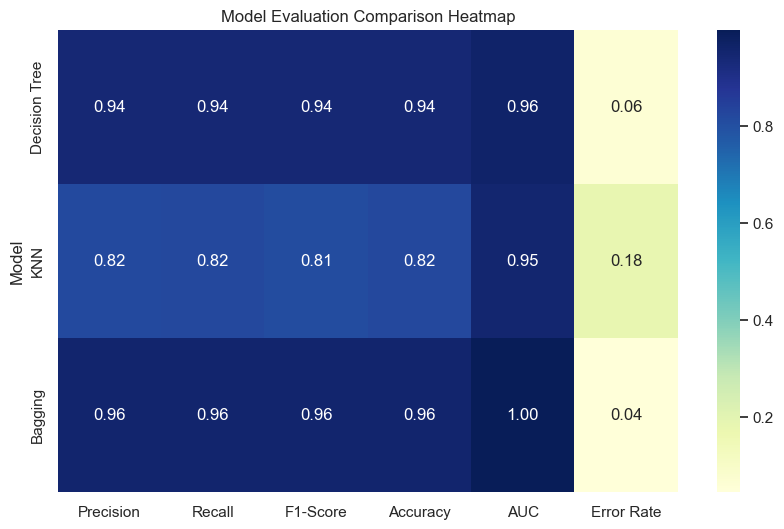

In [17]:
# پیش‌پردازش داده‌ها
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

# جدا کردن ویژگی‌ها و هدف
X = data.drop(columns=['NObeyesdad'])  # ویژگی‌ها
y = data['NObeyesdad']  # هدف

display(X)

# استانداردسازی داده‌ها (برای KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 10-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# نتایج برای هر مدل
results = {
    "Model": ["Decision Tree", "KNN", "Bagging"],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": [],
    "AUC": [],
    "Error Rate": []
}

# مدل‌ها
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Bagging", BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42))  # اصلاح شده
]

# اجرای cross-validation و محاسبه معیارها برای هر مدل
for model_name, model in models:
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []
    auc_scores = []
    error_rates = []
    
    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)  # احتمال پیش‌بینی برای تمام کلاس‌ها
        
        # محاسبه معیارها
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))  # اصلاح AUC برای مسائل چندکلاسه
        error_rates.append(1 - accuracy_score(y_test, y_pred))  # خطا = 1 - دقت

    # اضافه کردن میانگین معیارها به نتایج
    results["Precision"].append(np.mean(precision_scores))
    results["Recall"].append(np.mean(recall_scores))
    results["F1-Score"].append(np.mean(f1_scores))
    results["Accuracy"].append(np.mean(accuracy_scores))
    results["AUC"].append(np.mean(auc_scores))
    results["Error Rate"].append(np.mean(error_rates))

# تبدیل نتایج به DataFrame
model_comparison = pd.DataFrame(results)

# حذف ستون "Model" برای رسم Heatmap
model_comparison.set_index("Model", inplace=True)

# رسم نمودار Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(model_comparison, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title("Model Evaluation Comparison Heatmap")
plt.show()


# فاز پنجم 

خوشه بندی کا مینز

بدست آوردن بهترین مقدار کا با استفاده از روش البو و سیلوئت

Optimal k (combined Elbow and Silhouette): 10


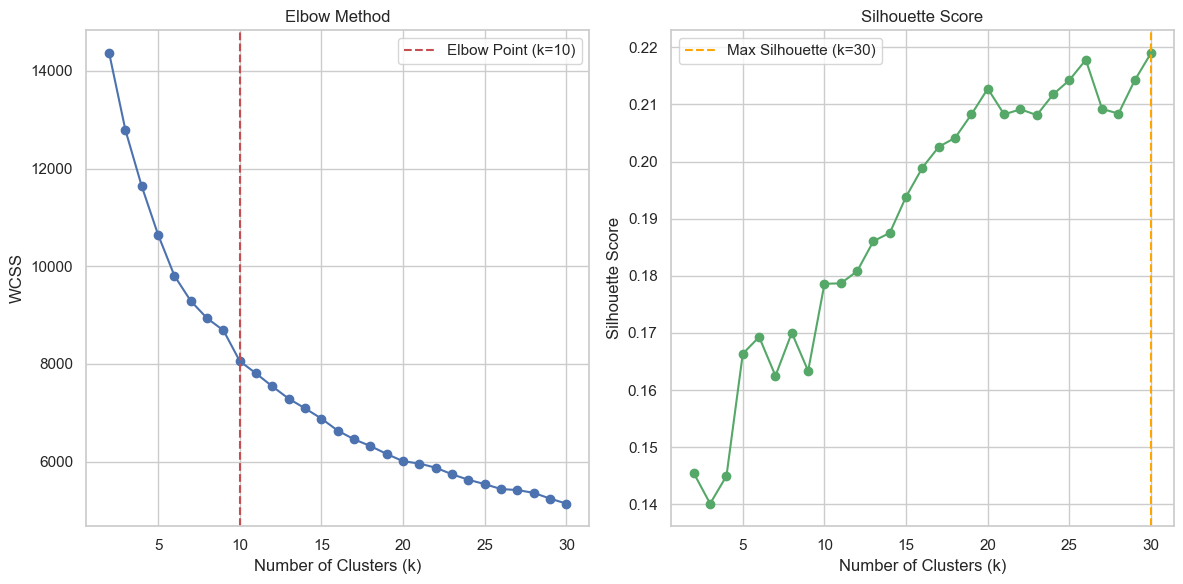

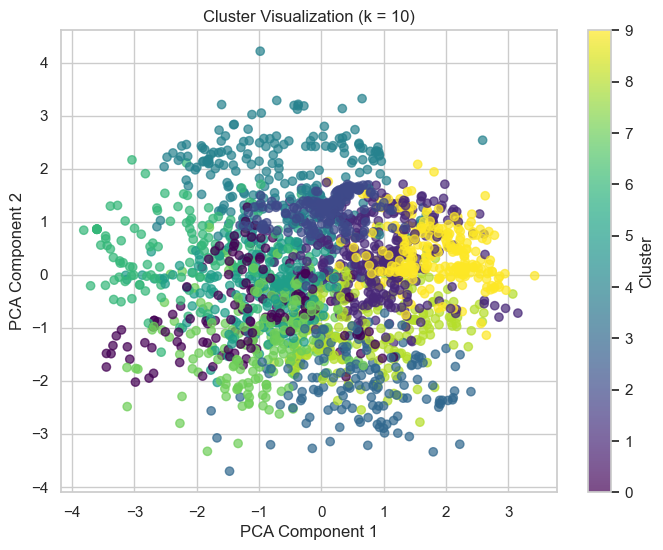

In [18]:
processed_data = data.copy()

features = processed_data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X = scaler.fit_transform(features)

# لیست‌های ذخیره WCSS و Silhouette Score
wcss = []
sil_scores = []

# آزمون برای k بین 2 تا 31
k_range = range(2, 31)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # محاسبه WCSS
    wcss.append(kmeans.inertia_)

    # محاسبه Silhouette Score
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)

# پیدا کردن نقطه آرنج با استفاده از KneeLocator
knee_locator = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
elbow_k = knee_locator.knee

# پیدا کردن بهترین k بر اساس بیشترین مقدار Silhouette Score
silhouette_k = k_range[sil_scores.index(max(sil_scores))]

# ترکیب Elbow و Silhouette برای انتخاب k بهینه
if elbow_k == silhouette_k:
    optimal_k = elbow_k
else:
    # اگر مقدار Elbow و Silhouette تفاوت داشته باشند، می‌توان اولویت را به سیلوئت داد
    optimal_k = elbow_k
print(f"Optimal k (combined Elbow and Silhouette): {optimal_k}")

# نمایش Elbow و Silhouette به همراه k بهینه
plt.figure(figsize=(12, 6))

# نمایش Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', color='b')
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow Point (k={elbow_k})')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.legend()

# نمایش Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='g')
plt.axvline(x=silhouette_k, color='orange', linestyle='--', label=f'Max Silhouette (k={silhouette_k})')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

# اجرای خوشه‌بندی با k بهینه
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X)

# کاهش ابعاد برای نمایش بصری
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# رسم خوشه‌ها
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', alpha=0.7)
plt.title(f"Cluster Visualization (k = {optimal_k})")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

بررسی کیفیت هر خوشه


### Cluster Analysis ###
+-----------+--------------------+---------+--------+----------------------------+------------------------------------------------------------+
|   Cluster |   Silhouette Score |    WCSS |   Size |   Avg Distance to Centroid | Distances to Others                                        |
+===========+====================+=========+========+============================+============================================================+
|         0 |               0.13 |  644.5  |    139 |                       2.11 | 0.00, 3.30, 3.31, 3.17, 3.71, 3.15, 2.27, 2.58, 3.63, 3.55 |
+-----------+--------------------+---------+--------+----------------------------+------------------------------------------------------------+
|         1 |               0.13 | 1155.46 |    312 |                       1.85 | 3.30, 0.00, 2.63, 2.83, 2.77, 2.78, 3.54, 2.63, 2.66, 2.19 |
+-----------+--------------------+---------+--------+----------------------------+----------------------------

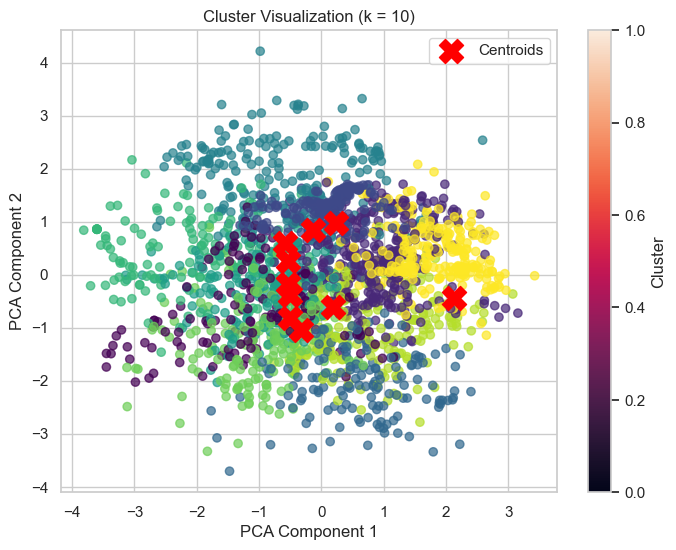

In [21]:
# اجرای KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# اضافه کردن لیبل‌های خوشه‌بندی به داده‌ها
data['Cluster'] = kmeans.labels_

# معیارها برای هر خوشه
clusters = sorted(data['Cluster'].unique())  # مرتب‌سازی خوشه‌ها
centroids = kmeans.cluster_centers_

# لیست برای ذخیره نتایج هر خوشه
cluster_analysis = []

for cluster in clusters:
    # 1. Silhouette Score برای هر خوشه
    cluster_data = X[kmeans.labels_ == cluster]
    silhouette_vals = silhouette_samples(X, kmeans.labels_)
    cluster_silhouette = silhouette_vals[kmeans.labels_ == cluster].mean()

    # 2. WCSS (فاصله مجموع مربع‌های نقاط خوشه از مرکز خوشه)
    wcss_cluster = ((cluster_data - centroids[cluster])**2).sum()

    # 3. اندازه خوشه (تعداد نمونه‌ها در خوشه)
    cluster_size = cluster_data.shape[0]

    # 4. فاصله مرکز خوشه با سایر خوشه‌ها
    distances_to_other_centroids = cdist([centroids[cluster]], centroids, 'euclidean').flatten()

    # 5. میانگین فاصله نقاط از مرکز خوشه خود
    avg_distance_to_centroid = cdist(cluster_data, [centroids[cluster]], 'euclidean').mean()

    # اضافه کردن نتایج به لیست
    cluster_analysis.append({
        "Cluster": cluster,
        "Silhouette Score": f"{cluster_silhouette:.2f}",
        "WCSS": f"{wcss_cluster:.2f}",
        "Size": cluster_size,
        "Avg Distance to Centroid": f"{avg_distance_to_centroid:.2f}",
        "Distances to Others": ", ".join([f"{d:.2f}" for d in distances_to_other_centroids])
    })

# نمایش نتایج خوشه‌ها به صورت جدول
print("\n### Cluster Analysis ###")
print(tabulate(cluster_analysis, headers="keys", tablefmt="grid"))

# کاهش ابعاد با PCA برای نمایش بصری خوشه‌ها
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# رسم خوشه‌ها در دو بعد با استفاده از PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title(f"Cluster Visualization (k = {optimal_k})")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


1. Cluster (خوشه)

شماره خوشه که نقاط داده به آن تعلق دارند (از ۰ تا ۹ در اینجا).
این اعداد صرفاً برچسب هستند و ترتیب خاصی ندارند.

2. Silhouette Score (امتیاز سیلوئت)

این معیار کیفیت خوشه‌بندی را نشان می‌دهد.
مقادیر بین -1 تا +1 هستند:

مقادیر نزدیک به ۱: نشان می‌دهد که داده‌های این خوشه به خوبی گروه‌بندی شده‌اند و فاصله زیادی از سایر خوشه‌ها دارند.
مقادیر نزدیک به ۰: نشان می‌دهد که داده‌های این خوشه ممکن است همپوشانی زیادی با سایر خوشه‌ها داشته باشند.

مقادیر منفی: نشان می‌دهد که داده‌ها احتمالاً به خوشه اشتباهی اختصاص داده شده‌اند.

مشاهده در جدول:

خوشه ۲ با مقدار ۰.۴۴ بهترین کیفیت را دارد، در حالی که خوشه ۴ با مقدار ۰.۰۸ کیفیت پایینی دارد.
خوشه‌هایی با سیلوئت کمتر از ۰.۲ (مانند خوشه‌های ۰، ۱، ۴ و ۸) ممکن است به خوبی جدا نشده باشند.

3. WCSS (فاصله مجموع مربعات درون خوشه)

این مقدار نشان‌دهنده جمع مربع فاصله نقاط هر خوشه از مرکز خوشه است.
هرچه WCSS کمتر باشد، نشان می‌دهد که نقاط خوشه نزدیک‌تر به مرکز خوشه قرار دارند (خوشه فشرده‌تر است).
مشاهده در جدول:

خوشه ۲ با مقدار WCSS ۳۹۶.۰۷ کوچک‌ترین پراکندگی را دارد (بهترین خوشه از نظر فشردگی).

خوشه ۴ با مقدار WCSS ۱۲۵۱.۵۷ بیشترین پراکندگی را دارد (کمترین فشردگی).

4. Size (اندازه خوشه)

تعداد نقاط داده‌ای که به هر خوشه تعلق دارند.
اندازه خوشه می‌تواند نشان دهد که آیا خوشه به طور متناسب با داده‌ها تقسیم شده است یا خیر.

مشاهده در جدول:

بزرگ‌ترین خوشه ۱ است که ۳۱۲ نقطه داده دارد.

کوچک‌ترین خوشه ۶ است که تنها ۱۶۶ نقطه داده دارد.

خوشه‌هایی با اندازه کوچک‌تر ممکن است نشان‌دهنده تقسیم بیش از حد (over-clustering) باشند.

5. Avg Distance to Centroid (میانگین فاصله نقاط تا مرکز خوشه)

میانگین فاصله نقاط داده در خوشه از مرکز خوشه خود.

هرچه این مقدار کمتر باشد، نشان‌دهنده فشردگی و تمرکز بالاتر نقاط در اطراف مرکز خوشه است.

مشاهده در جدول:

خوشه ۲ با مقدار ۱.۲۴ کوچک‌ترین میانگین فاصله را دارد (فشرده‌ترین خوشه).

خوشه ۴ با مقدار ۲.۲۸ بزرگ‌ترین میانگین فاصله را دارد (پراکنده‌ترین خوشه).

6. Distances to Others (فاصله مرکز خوشه با سایر خوشه‌ها)

فاصله اقلیدسی بین مرکز این خوشه و مراکز سایر خوشه‌ها.

فاصله بیشتر نشان‌دهنده جداشدگی بهتر این خوشه از سایر خوشه‌ها است.

مشاهده در جدول:

به عنوان مثال:

خوشه ۰ فاصله‌ای برابر با ۲.۲۷ تا خوشه ۶ دارد که نزدیک‌ترین فاصله به آن است.
خوشه ۹ فاصله‌ای برابر با ۴.۲۱ تا خوشه ۶ دارد که نشان می‌دهد این دو خوشه بسیار از هم جدا هستند.
اگر فاصله یک خوشه از سایر خوشه‌ها کم باشد، احتمال همپوشانی وجود دارد.

تفسیر کلی از خوشه‌ها:

خوشه‌های خوب (کیفیت بالا):

خوشه ۲:

بهترین امتیاز سیلوئت (۰.۴۴).

کمترین مقدار WCSS (۳۹۶.۰۷).

کمترین میانگین فاصله به مرکز (۱.۲۴).

نشان می‌دهد که این خوشه فشرده، متمرکز و به خوبی جدا شده است.

خوشه‌های ضعیف (کیفیت پایین):

خوشه ۴:

کمترین امتیاز سیلوئت (۰.۰۸).

بیشترین مقدار WCSS (۱۲۵۱.۵۷).

بیشترین میانگین فاصله به مرکز (۲.۲۸).

نشان می‌دهد که این خوشه پراکنده است و ممکن است به خوبی از سایر خوشه‌ها جدا نشده باشد.

اندازه‌های نامتناسب:

خوشه ۱ بزرگ‌ترین خوشه است (۳۱۲ نقطه)، در حالی که خوشه ۶ کوچک‌ترین خوشه است (۱۶۶ نقطه). ممکن است خوشه ۱ بیش از حد بزرگ باشد و نیاز به تقسیم داشته باشد.


# فاز پنجم بخش اففرادی

میلاد مودی

ترکیب خوشه بندی و طبقهه بندی

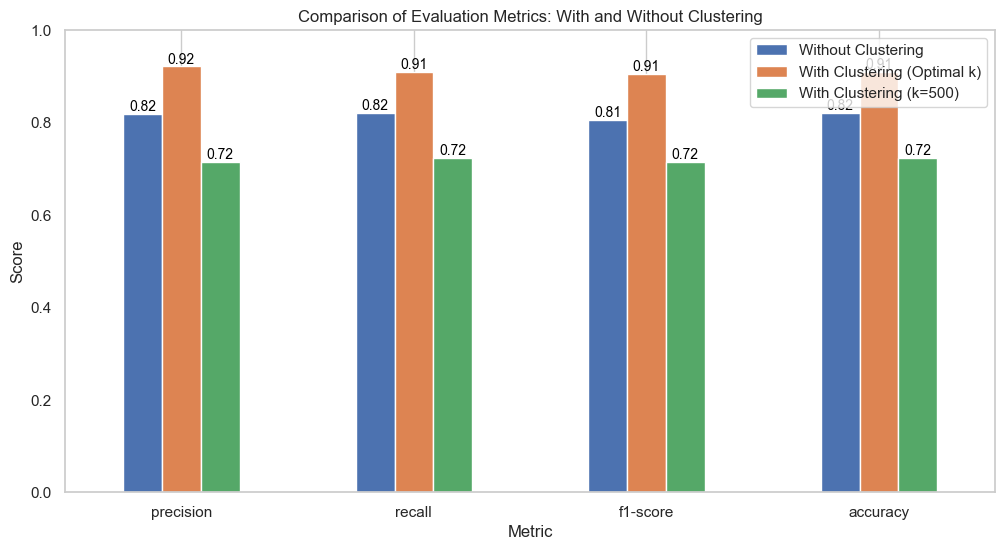

In [22]:
# 1. پیش‌پردازش داده‌ها
processed_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
le = LabelEncoder()
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
for col in categorical_columns:
    processed_data[col] = le.fit_transform(processed_data[col])

numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
processed_data[numerical_columns] = scaler.fit_transform(processed_data[numerical_columns])

# جدا کردن متغیر هدف
X = processed_data.drop(columns=['NObeyesdad'])
y = processed_data['NObeyesdad']

# انتخاب تعداد خوشه‌ها بر اساس نمودار
optimal_clusters = optimal_k
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
processed_data['Cluster'] = kmeans.fit_predict(X)

# 3. تقسیم داده‌ها برای طبقه‌بندی
X_with_cluster = processed_data  # داده با ویژگی خوشه‌بندی
X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size=0.2, random_state=42)

# تقسیم داده‌ها برای مدل بدون خوشه‌بندی
X_train_no_cluster, X_test_no_cluster, y_train_no_cluster, y_test_no_clustering = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. طبقه‌بندی با KNN
# الف) بدون خوشه‌بندی
clf_knn_no_clustering = KNeighborsClassifier(n_neighbors=5)
clf_knn_no_clustering.fit(X_train_no_cluster, y_train_no_cluster)
y_pred_knn_no_clustering = clf_knn_no_clustering.predict(X_test_no_cluster)

# ب) با خوشه‌بندی (k اپتیموم)
clf_knn_with_clustering = KNeighborsClassifier(n_neighbors=5)
clf_knn_with_clustering.fit(X_train, y_train)
y_pred_knn_with_clustering = clf_knn_with_clustering.predict(X_test)

# اضافه کردن خوشه‌بندی با k=500
kmeans_k500 = KMeans(n_clusters=500, random_state=42)
processed_data['Cluster_k500'] = kmeans_k500.fit_predict(X)

# تقسیم داده‌ها برای مدل خوشه‌بندی با k=500
X_with_cluster_k500 = processed_data  # داده با ویژگی خوشه‌بندی k=500
X_train_k500, X_test_k500, y_train_k500, y_test_k500 = train_test_split(X_with_cluster_k500, y, test_size=0.2, random_state=42)

# طبقه‌بندی با KNN برای خوشه‌بندی با k=500
clf_knn_with_clustering_k500 = KNeighborsClassifier(n_neighbors=5)
clf_knn_with_clustering_k500.fit(X_train_k500, y_train_k500)
y_pred_knn_with_clustering_k500 = clf_knn_with_clustering_k500.predict(X_test_k500)

# 5. ارزیابی مدل‌ها
# الف) بدون خوشه‌بندی
report_no_clustering = classification_report(y_test_no_clustering, y_pred_knn_no_clustering, output_dict=True)

# ب) با خوشه‌بندی (k اپتیموم)
report_with_clustering = classification_report(y_test, y_pred_knn_with_clustering, output_dict=True)

# ج) با خوشه‌بندی (k=500)
report_with_clustering_k500 = classification_report(y_test_k500, y_pred_knn_with_clustering_k500, output_dict=True)

# استخراج معیارها
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
comparison_metrics = pd.DataFrame({
    'Metric': metrics,
    'Without Clustering': [
        report_no_clustering['weighted avg']['precision'],
        report_no_clustering['weighted avg']['recall'],
        report_no_clustering['weighted avg']['f1-score'],
        accuracy_score(y_test_no_clustering, y_pred_knn_no_clustering)
    ],
    'With Clustering (Optimal k)': [
        report_with_clustering['weighted avg']['precision'],
        report_with_clustering['weighted avg']['recall'],
        report_with_clustering['weighted avg']['f1-score'],
        accuracy_score(y_test, y_pred_knn_with_clustering)
    ],
    'With Clustering (k=500)': [
        report_with_clustering_k500['weighted avg']['precision'],
        report_with_clustering_k500['weighted avg']['recall'],
        report_with_clustering_k500['weighted avg']['f1-score'],
        accuracy_score(y_test_k500, y_pred_knn_with_clustering_k500)
    ]
})

# رسم نمودار مقایسه با اعداد روی میله‌ها
comparison_metrics.set_index('Metric', inplace=True)
ax = comparison_metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Evaluation Metrics: With and Without Clustering')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(['Without Clustering', 'With Clustering (Optimal k)', 'With Clustering (k=500)'], loc='upper right')

# اضافه کردن اعداد روی هر میله
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y')
plt.show()


امیر رضا شکل زهی

In [23]:
# Load dataset (replace with your file path)
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Step 1: Preprocess the data
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Selecting numerical features
scaler = StandardScaler()
X = scaler.fit_transform(numerical_data)  # Normalize numerical data
y = data['NObeyesdad']  # Target variable (obesity levels)

# Step 2: Perform K-means clustering
optimal_k = 3  # Number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)  # Add cluster labels to the data

# Step 3: Train separate classifiers for each cluster
cluster_models = {}
for cluster in range(optimal_k):
    # Filter data for the current cluster
    cluster_indices = data[data['Cluster'] == cluster].index
    X_cluster = X[cluster_indices]
    y_cluster = y.iloc[cluster_indices]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train a Decision Tree classifier for this cluster
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    cluster_models[cluster] = model

# Step 4: Define a hybrid prediction function
def hybrid_predict(X_all):
    predictions = []
    for x in X_all:
        # Determine the cluster for the sample
        cluster_label = kmeans.predict([x])[0]
        # Predict using the model for that cluster
        predictions.append(cluster_models[cluster_label].predict([x])[0])
    return predictions

# Step 5: Evaluate the hybrid model
hybrid_predictions = hybrid_predict(X)
hybrid_accuracy = accuracy_score(y, hybrid_predictions)
hybrid_precision = precision_score(y, hybrid_predictions, average='weighted')
hybrid_recall = recall_score(y, hybrid_predictions, average='weighted')
hybrid_f1 = f1_score(y, hybrid_predictions, average='weighted')

# Step 6: Train a Decision Tree classifier on the original data (without clustering)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)
original_model = DecisionTreeClassifier(random_state=42)
original_model.fit(X_train_orig, y_train_orig)

# Evaluate the original model
y_pred_orig = original_model.predict(X_test_orig)
original_accuracy = accuracy_score(y_test_orig, y_pred_orig)
original_precision = precision_score(y_test_orig, y_pred_orig, average='weighted')
original_recall = recall_score(y_test_orig, y_pred_orig, average='weighted')
original_f1 = f1_score(y_test_orig, y_pred_orig, average='weighted')

# Step 7: Create a comparison table
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Hybrid Model": [hybrid_accuracy, hybrid_precision, hybrid_recall, hybrid_f1],
    "Original Model": [original_accuracy, original_precision, original_recall, original_f1]
})

# Print the comparison table
print(results)

      Metric  Hybrid Model  Original Model
0   Accuracy      0.981999        0.943262
1  Precision      0.982120        0.943551
2     Recall      0.981999        0.943262
3   F1-Score      0.982025        0.943006
